# Smart Energy Optimizer (supervised regression system )

This system predicts industrial energy use and emissions via supervised regression, analyzing energy type, equipment, and lifespan. 
It forecasts kWh, CO₂, and costs, then suggests optimizations to cut waste and expenses—helping industries operate sustainably.

# Data Loading

In [2]:
import pandas as pd

fact_df = pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Fact_Co2_Emissions.csv', delimiter=';')
equipment_df = pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv', delimiter=';')
energytype_df= pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Type_Energy.csv')
category_df = pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Category_Equipment.csv')


# Display the first few rows 

In [5]:
print(fact_df.head())
print(equipment_df.head())
print(energytype_df.head())
print(category_df.head())

   Fk_Date  Fk_Equipment  Fk_Material  Fk_Location  Fk_Brand  Fk_Supplier  \
0      401           325          668            2         4           37   
1      401           325          668            3         4           37   
2      401           325          668            4         4           37   
3      401           325          668            5         4           37   
4      401           325         1871            2         4           37   

   Carbon_Foot_Print_per_Unit_kgCo2  Transport_Distance_Km  \
0                               383                    300   
1                               383                    300   
2                               383                    300   
3                               383                    300   
4                               383                    300   

   Water_Consumption_PerUnit_L CO2_Emissions_kg_equipment Temperature  \
0                         1149                   255,8817          21   
1                 

# Checking for missing values

In [8]:

print("Valeurs manquantes dans le Fact DataFrame:")
print(fact_df.isnull().sum(), "\n")

print("Valeurs manquantes dans le Equipment DataFrame:")
print(equipment_df.isnull().sum(), "\n")

print("Valeurs manquantes dans le Equipment DataFrame:")
print(energytype_df.isnull().sum(), "\n")

print("Valeurs manquantes dans le Equipment DataFrame:")
print(category_df.isnull().sum(), "\n")


Valeurs manquantes dans le Fact DataFrame:
Fk_Date                             0
Fk_Equipment                        0
Fk_Material                         0
Fk_Location                         0
Fk_Brand                            0
Fk_Supplier                         0
Carbon_Foot_Print_per_Unit_kgCo2    0
Transport_Distance_Km               0
Water_Consumption_PerUnit_L         0
CO2_Emissions_kg_equipment          0
Temperature                         0
Humidity                            0
Wind_Speed                          0
CO2_Ambient_Level                   0
Energy_Consumption_kWh              0
Renewable_Energy_Percentage         0
dtype: int64 

Valeurs manquantes dans le Equipment DataFrame:
Pk_Equipment                0
Equipment_ID                0
Equipment_Name              0
Fk_Mfrequency               0
Fk_MCycle                   0
Fk_Category                 0
Fk_Energy                   0
Manufacturer                0
Estimated_Lifetime_Years    0
dtype: int64 

V

# Data Exploration

In [16]:
print(fact_df.info())
print(equipment_df.info())
print(energytype_df.info())
print(category_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6171 entries, 0 to 6170
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Fk_Date                           6171 non-null   int64 
 1   Fk_Equipment                      6171 non-null   int64 
 2   Fk_Material                       6171 non-null   int64 
 3   Fk_Location                       6171 non-null   int64 
 4   Fk_Brand                          6171 non-null   int64 
 5   Fk_Supplier                       6171 non-null   int64 
 6   Carbon_Foot_Print_per_Unit_kgCo2  6171 non-null   int64 
 7   Transport_Distance_Km             6171 non-null   int64 
 8   Water_Consumption_PerUnit_L       6171 non-null   int64 
 9   CO2_Emissions_kg_equipment        6171 non-null   object
 10  Temperature                       6171 non-null   object
 11  Humidity                          6171 non-null   int64 
 12  Wind_Speed          

# *****Smart Energy Prediction Tool*****

This project creates an AI system to forecast electricity use (kWh) and carbon emissions (CO₂) for factories and industries. We tested three different computer models (XGBoost, Random Forest, and Linear Regression) to find the most accurate predictions.

The easy-to-use menu lets you:

Check your current energy performance

Compare different equipment settings

Find ways to save energy

Create ready-to-use reports

This smart tool helps industries save money and reduce pollution by giving clear, data-based suggestions for better energy use.

# I- Linear Regression 

In [8]:
## import pandas as pd
import joblib
from fpdf import FPDF
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import warnings
import os
warnings.filterwarnings('ignore')

# =============================================
# ADVANCED CONFIGURATION (French calculation model)
# =============================================

class EnergyAIAssistant:
    def __init__(self):
        self.colors = {
            'dark_blue': (0, 51, 102),
            'light_blue': (173, 216, 230),
            'green': (0, 128, 0),
            'red': (255, 0, 0),
            'orange': (255, 165, 0),
            'gray': (240, 240, 240)
        }
        
        # French keys with original values
        self.energy_factors = {
            'Fioul': {'consumption': 1.2, 'emission': 0.25, 'color': (139, 69, 19)},
            'Gaz': {'consumption': 1.0, 'emission': 0.15, 'color': (255, 165, 0)},
            'Electricité': {'consumption': 0.8, 'emission': 0.10, 'color': (255, 255, 0)},
            'Solaire': {'consumption': 0.5, 'emission': 0.02, 'color': (255, 215, 0)}
        }
        
        # French equipment names
        self.equipment_impact = {
            'Production': {'impact': 1.0},
            'Transformation': {'impact': 0.9},
            'Refrigeration': {'impact': 0.8},
            'Conditionnement': {'impact': 0.6},
            'Nettoyage': {'impact': 0.4},
            'Controle Qualite': {'impact': 0.3}
        }

    def calculate_smart_consumption(self, energy_type, equipment_type, lifetime):
        base = 3000
        energy_factor = self.energy_factors[energy_type]['consumption']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        age_factor = 1 + (lifetime * 0.02)
        return base * energy_factor * equipment_factor * age_factor

    def calculate_smart_emissions(self, energy_type, equipment_type, consumption):
        emission_factor = self.energy_factors[energy_type]['emission']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        return consumption * emission_factor * equipment_factor

# =============================================
# GREEN PULSE DESIGN (English interface)
# =============================================

class GreenPulseDesign:
    def __init__(self):
        self.colors = {
            'primary': (0, 105, 92),
            'secondary': (139, 195, 74),
            'accent': (255, 193, 7),
            'dark': (33, 33, 33),
            'light': (245, 245, 245)
        }
        
        self.logo = "GREEN PULSE"
        self.slogan = "Feel the pulse of sustainability"
        
    def add_header(self, pdf):
        pdf.set_fill_color(*self.colors['primary'])
        pdf.rect(0, 0, 210, 25, 'F')
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(255, 255, 255)
        pdf.set_xy(10, 8)
        pdf.cell(0, 10, self.logo, 0, 0, 'L')
        
        pdf.set_font('Helvetica', 'I', 10)
        pdf.set_xy(10, 15)
        pdf.cell(0, 10, self.slogan, 0, 0, 'L')
        
        pdf.set_font('Helvetica', '', 10)
        pdf.set_xy(0, 8)
        pdf.cell(190, 10, datetime.now().strftime('%d/%m/%Y'), 0, 0, 'R')
        
        pdf.set_y(30)
        
    def add_footer(self, pdf):
        pdf.set_y(-15)
        pdf.set_font('Helvetica', 'I', 8)
        pdf.set_text_color(*self.colors['dark'])
        pdf.cell(0, 10, f"Page {pdf.page_no()}", 0, 0, 'C')

# =============================================
# INTERACTIVE INTELLIGENT SYSTEM (Linear Regression)
# =============================================

class SmartEnergySystem:
    def __init__(self):
        self.assistant = EnergyAIAssistant()
        self.design = GreenPulseDesign()
        self.model = None
        self.load_model()
    
    def load_model(self):
        try:
            self.model = joblib.load('linear_energy_model.pkl')
            print("System loaded successfully | Linear Regression model ready")
        except:
            print("Training a new linear regression model...")
            self.train_model()
    
    def train_model(self):
        data = self.generate_smart_data()
        X = data[['Type_Energy', 'Category_Equipment', 'Estimated_Lifetime_Years']]
        y = data[['Energy_Consumption_kWh', 'CO2_Emissions_kg']]
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type_Energy', 'Category_Equipment'])
            ],
            remainder='passthrough'
        )
        
        self.model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])
        
        self.model.fit(X, y)
        joblib.dump(self.model, 'linear_energy_model.pkl')
        print("Linear regression model trained successfully!")
    
    def generate_smart_data(self):
        energy_types = list(self.assistant.energy_factors.keys())
        equipment_types = list(self.assistant.equipment_impact.keys())
        
        data = {
            'Type_Energy': np.random.choice(energy_types, 500),
            'Category_Equipment': np.random.choice(equipment_types, 500),
            'Estimated_Lifetime_Years': np.random.randint(1, 25, 500)
        }
        
        df = pd.DataFrame(data)
        
        # Linear relationships for regression
        df['Energy_Consumption_kWh'] = df.apply(
            lambda row: self.assistant.calculate_smart_consumption(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Estimated_Lifetime_Years']
            ), axis=1)
        
        df['CO2_Emissions_kg'] = df.apply(
            lambda row: self.assistant.calculate_smart_emissions(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Energy_Consumption_kWh']
            ), axis=1)
        
        return df
    
    def interactive_diagnostic(self):
        print("\n" + "="*50)
        print("EXPERT ENERGY ANALYSIS SYSTEM")
        print("="*50 + "\n")
        
        print("1. Full diagnostic")
        print("2. Scenario comparison")
        print("3. Smart optimization")
        print("4. Advanced PDF report")
        print("5. Exit\n")
        
        choice = input("Your choice (1-5): ")
        
        if choice == '1':
            self.full_diagnostic()
        elif choice == '2':
            self.compare_scenarios()
        elif choice == '3':
            self.smart_optimization()
        elif choice == '4':
            self.generate_pdf_report()
        else:
            print("Goodbye!")
            return False
        return True
    
    def full_diagnostic(self):
        print("\n" + "="*50)
        print("COMPLETE DIAGNOSTIC")
        print("="*50 + "\n")
        
        data = self.get_user_input()
        results = self.predict_energy(data)
        
        print("\nDIAGNOSTIC RESULTS:")
        print(f"- Estimated consumption: {results['kwh']:.2f} kWh")
        print(f"- Estimated CO2 emissions: {results['co2']:.2f} kg")
        print(f"- Estimated cost: {results['cost']:.2f} EUR")
        
        self.show_visualization(data, results)
        self.generate_pdf_report(data, results)
    
    def predict_energy(self, data):
        input_df = pd.DataFrame([data])
        prediction = self.model.predict(input_df)
        
        return {
            'kwh': prediction[0][0],
            'co2': prediction[0][1],
            'cost': prediction[0][0] * 0.15
        }
    
    def get_user_input(self):
        print("\nPlease enter the required information:")
        
        print("\nAvailable energy types:")
        for i, energy in enumerate(self.assistant.energy_factors.keys(), 1):
            print(f"{i}. {energy}")
        energy_choice = int(input("\nSelect energy type (1-4): ")) - 1
        energy_type = list(self.assistant.energy_factors.keys())[energy_choice]
        
        print("\nAvailable equipment categories:")
        for i, equip in enumerate(self.assistant.equipment_impact.keys(), 1):
            print(f"{i}. {equip}")
        equip_choice = int(input("\nSelect category (1-6): ")) - 1
        equip_type = list(self.assistant.equipment_impact.keys())[equip_choice]
        
        lifetime = float(input("\nEstimated lifetime (years): "))
        
        return {
            'Type_Energy': energy_type,
            'Category_Equipment': equip_type,
            'Estimated_Lifetime_Years': lifetime
        }
    
    def show_visualization(self, data, results):
        plt.figure(figsize=(12, 6))
        
        # Bar chart
        plt.subplot(1, 2, 1)
        values = [results['kwh'], results['co2'], results['cost']]
        labels = ['Consumption (kWh)', 'Emissions (kg CO2)', 'Cost (EUR)']
        colors = ['#FFA500', '#FF4500', '#4169E1']
        plt.bar(labels, values, color=colors)
        plt.title("Diagnostic Results")
        plt.ylabel("Values")
        
        # Pie chart
        plt.subplot(1, 2, 2)
        energy_color = self.assistant.energy_factors[data['Type_Energy']]['color']
        sizes = [results['kwh'], 3000]
        labels = ['Your consumption', 'Average']
        plt.pie(sizes, labels=labels, colors=['#%02x%02x%02x' % energy_color, 'lightgray'],
                autopct='%1.1f%%', startangle=90)
        plt.title("Comparison with average")
        
        plt.tight_layout()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300)
        plt.close()
        
        return img_buffer
    
    def generate_comparison_chart(self, results):
        plt.figure(figsize=(10, 6))
        
        categories = ['Consumption (kWh)', 'CO2 Emissions (kg)', 'Cost (EUR)']
        your_data = [results['kwh'], results['co2'], results['cost']]
        sector_avg = [2920, 704, 2920 * 0.15]
        
        x = np.arange(len(categories))
        width = 0.35
        
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, your_data, width, label='Your installation', color='#00695C')
        rects2 = ax.bar(x + width/2, sector_avg, width, label='Sector average', color='#8BC34A')
        
        ax.set_ylabel('Values')
        ax.set_title('Comparison with sector averages')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300, bbox_inches='tight')
        plt.close()
        
        return img_buffer
    
    def generate_pdf_report(self, data=None, results=None):
        if data is None or results is None:
            print("\n" + "="*50)
            print("ADVANCED REPORT GENERATION")
            print("="*50 + "\n")
            
            data = self.get_user_input()
            results = self.predict_energy(data)

        pdf = FPDF()
        pdf.set_auto_page_break(auto=True, margin=25)
        
        # ========= PAGE 1 - COVER PAGE =========
        pdf.add_page()
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.rect(0, 0, 210, 297, 'F')
        
        pdf.set_y(80)
        pdf.set_font('Helvetica', 'B', 36)
        pdf.set_text_color(255, 255, 255)
        pdf.cell(0, 20, "GREEN PULSE", 0, 1, 'C')
        
        pdf.set_font('Helvetica', 'I', 18)
        pdf.cell(0, 15, "Energy Analysis Report", 0, 1, 'C')
        
        pdf.set_draw_color(*self.design.colors['accent'])
        pdf.set_line_width(1)
        pdf.line(50, 140, 160, 140)
        
        pdf.set_y(160)
        pdf.set_font('Helvetica', '', 14)
        pdf.cell(0, 10, f"Date: {datetime.now().strftime('%d %B %Y')}", 0, 1, 'C')
        pdf.cell(0, 10, "Personalized analysis", 0, 1, 'C')
        
        # ========= PAGE 2 - TABLE OF CONTENTS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Table of Contents", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', '', 12)
        pdf.set_text_color(*self.design.colors['dark'])
        
        contents = [
            ("1. Results Summary", 4),
            ("2. Detailed Analysis", 5),
            ("3. Sector Comparison", 6),
            ("4. Strategic Recommendations", 7),
            ("5. Technical Appendices", 8)
        ]
        
        for item, page in contents:
            pdf.cell(5, 7, '-', 0, 0)
            pdf.cell(5)
            pdf.cell(140, 7, item, 0, 0)
            pdf.cell(0, 7, f"Page {page}", 0, 1)
            pdf.ln(3)
        
        # ========= PAGE 3 - EXECUTIVE SYNOPSIS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Executive Synopsis", 0, 1)
        pdf.ln(10)
        
        pdf.set_fill_color(*self.design.colors['light'])
        pdf.rect(10, pdf.get_y(), 190, 50, 'F')
        pdf.set_xy(15, pdf.get_y()+5)
        
        pdf.set_font('Helvetica', 'B', 14)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.multi_cell(0, 7, "Key Points of Energy Analysis")
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        pdf.set_text_color(*self.design.colors['dark'])
        key_points = [
            f"- Energy consumption: {results['kwh']:.2f} kWh",
            f"- CO2 emissions: {results['co2']:.2f} kg (equivalent {results['co2']/1000:.2f} tons)",
            f"- Estimated cost: {results['cost']:.2f} EUR",
            f"- Energy type: {data['Type_Energy']}",
            f"- Equipment category: {data['Category_Equipment']}"
        ]
        
        for point in key_points:
            pdf.cell(5)
            pdf.multi_cell(0, 7, point)
            pdf.ln(2)
        
        pdf.ln(15)
        
        img_buffer = self.show_visualization(data, results)
        chart_filename = "temp_chart.png"
        with open(chart_filename, "wb") as f:
            f.write(img_buffer.getbuffer())
        
        pdf.image(chart_filename, x=pdf.l_margin, y=None, w=190)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', 'I', 10)
        pdf.cell(0, 10, "Figure 1: Comparative analysis of your energy consumption", 0, 1)
        
        # ========= PAGE 4 - RESULTS SUMMARY =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Results Summary", 0, 1)
        pdf.ln(10)
        
        indicators = [
            ["Indicator", "Value", "Level", "Impact"],
            ["Consumption", f"{results['kwh']:.2f} kWh", 
             self.get_impact_level(results['kwh'], 2000, 3500),
             self.get_impact_icon(results['kwh'], 2000, 3500)],
            ["CO2 Emissions", f"{results['co2']:.2f} kg", 
             self.get_impact_level(results['co2'], 300, 500),
             self.get_impact_icon(results['co2'], 300, 500)],
            ["Energy Cost", f"{results['cost']:.2f} EUR", 
             self.get_impact_level(results['cost'], 300, 500),
             self.get_impact_icon(results['cost'], 300, 500)]
        ]
        
        self.create_enhanced_table(pdf, indicators, "Key Performance Indicators")
        
        pdf.ln(15)
        pdf.set_font('Helvetica', 'B', 14)
        pdf.cell(0, 10, "Global Analysis", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        analysis_text = f"""
        The analysis of your current energy configuration reveals a consumption of {results['kwh']:.2f} kWh, 
        which is in the {self.get_impact_level(results['kwh'], 2000, 3500).lower()} 
        range compared to sector standards. Your use of {data['Type_Energy']} as primary energy source 
        generates {results['co2']:.2f} kg of CO2 emissions, with an environmental impact 
        rated as {self.get_impact_level(results['co2'], 300, 500).lower()}.
        
        The estimated cost of {results['cost']:.2f} EUR represents a potential annual savings opportunity 
        of {(results['cost'] * 0.15):.2f} EUR with appropriate optimizations.
        """
        pdf.multi_cell(0, 7, analysis_text)
        
        # ========= PAGE 5 - DETAILED ANALYSIS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Detailed Analysis", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Current Configuration", 0, 1)
        pdf.ln(5)
        
        config_data = [
            ["Parameter", "Detail", "Impact"],
            ["Energy source", data['Type_Energy'], 
             f"Factor: {self.assistant.energy_factors[data['Type_Energy']]['consumption']}"],
            ["Equipment", f"{data['Category_Equipment']}", 
             f"Impact: {self.assistant.equipment_impact[data['Category_Equipment']]['impact']}"],
            ["Lifetime", f"{data['Estimated_Lifetime_Years']} years", 
             f"Age factor: {1 + (data['Estimated_Lifetime_Years'] * 0.02):.2f}"]
        ]
        self.create_enhanced_table(pdf, config_data)
        
        pdf.ln(15)
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Impact Distribution", 0, 1)
        pdf.ln(5)
        
        plt.figure(figsize=(10, 6))
        labels = ['Energy Source', 'Equipment Type', 'Equipment Age']
        sizes = [
            self.assistant.energy_factors[data['Type_Energy']]['consumption'] * 40,
            self.assistant.equipment_impact[data['Category_Equipment']]['impact'] * 35,
            (1 + (data['Estimated_Lifetime_Years'] * 0.02)) * 25
        ]
        colors = [
            '#%02x%02x%02x' % self.assistant.energy_factors[data['Type_Energy']]['color'],
            '#%02x%02x%02x' % self.design.colors['secondary'],
            '#%02x%02x%02x' % self.design.colors['accent']
        ]
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Impact Factors Distribution')
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300, bbox_inches='tight')
        plt.close()
        
        with open("temp_pie.png", "wb") as f:
            f.write(img_buffer.getbuffer())
        
        pdf.image("temp_pie.png", x=pdf.l_margin, y=None, w=150, h=100)
        pdf.ln(5)
        
        # ========= PAGE 6 - SECTOR COMPARISON =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Sector Benchmark", 0, 1)
        pdf.ln(10)
        
        comparison_chart = self.generate_comparison_chart(results)
        with open("temp_benchmark.png", "wb") as f:
            f.write(comparison_chart.getbuffer())
        
        pdf.image("temp_benchmark.png", x=pdf.l_margin, y=None, w=180)
        pdf.ln(5)
        
        pdf.ln(10)
        pdf.set_font('Helvetica', 'B', 14)
        pdf.cell(0, 10, "Comparative Analysis", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        benchmark_text = """
        The comparison with sector averages positions your energy performance 
        against industry standards. Significant differences identify potential 
        improvement opportunities.
        """
        pdf.multi_cell(0, 7, benchmark_text)
        
        pdf.ln(10)
        benchmark_data = [
            ["Metric", "Your Value", "Sector Average", "Difference"],
            ["Consumption (kWh)", f"{results['kwh']:.2f}", "2920", f"{results['kwh']-2920:+.2f}"],
            ["CO2 Emissions (kg)", f"{results['co2']:.2f}", "704", f"{results['co2']-704:+.2f}"],
            ["Cost (EUR)", f"{results['cost']:.2f}", "438", f"{results['cost']-438:+.2f}"]
        ]
        self.create_enhanced_table(pdf, benchmark_data, "Comparative Data")
        
        # ========= PAGE 7 - RECOMMENDATIONS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Strategic Recommendations", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', '', 12)
        intro_text = """
        Based on our in-depth analysis, we propose the following recommendations to optimize 
        your energy performance, reduce your environmental impact and decrease operational costs.
        """
        pdf.multi_cell(0, 7, intro_text)
        pdf.ln(10)
        
        recommendations = self.generate_recommendations(data, results)
        
        for i, rec in enumerate(recommendations, 1):
            pdf.set_fill_color(*self.design.colors['light'])
            pdf.rect(10, pdf.get_y(), 190, 25, 'F')
            
            pdf.set_xy(15, pdf.get_y()+5)
            pdf.set_fill_color(*self.design.colors['accent'])
            pdf.cell(10, 10, str(i), 0, 0, 'C', 1)
            
            pdf.set_xy(30, pdf.get_y()+5)
            pdf.set_font('Helvetica', 'B', 12)
            pdf.set_text_color(*self.design.colors['primary'])
            pdf.multi_cell(160, 7, rec)
            
            pdf.ln(15)
        
        # ========= PAGE 8 - APPENDICES =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Technical Appendices", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Analysis Methodology", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        method_text = """
        Our analysis relies on a linear regression model, trained on 
        a wide range of industrial energy configurations. The factors considered include:
        
        - The energy source type and its emission factor
        - The equipment category and its energy impact
        - The equipment age and its effect on efficiency
        
        Results are compared to sector data from the Green Pulse knowledge base.
        """
        pdf.multi_cell(0, 7, method_text)
        
        self.design.add_footer(pdf)
        
        filename = f"GreenPulse_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pdf"
        pdf.output(filename)
        
        for temp_file in ["temp_chart.png", "temp_pie.png", "temp_benchmark.png"]:
            try:
                os.remove(temp_file)
            except:
                pass
        
        print(f"\nProfessional report generated: {filename}")
    
    def create_enhanced_table(self, pdf, data, title=None):
        if title:
            pdf.set_font('Helvetica', 'B', 14)
            pdf.set_text_color(*self.design.colors['primary'])
            pdf.cell(0, 10, title, 0, 1)
            pdf.ln(3)
        
        col_widths = []
        for i in range(len(data[0])):
            max_len = max(len(str(row[i])) for row in data)
            col_widths.append(pdf.get_string_width('X' * (max_len + 2)))
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.set_text_color(255, 255, 255)
        pdf.set_font('Helvetica', 'B', 10)
        
        for i, header in enumerate(data[0]):
            pdf.cell(col_widths[i], 7, str(header), 1, 0, 'C', 1)
        pdf.ln()
        
        pdf.set_font('Helvetica', '', 10)
        
        for row in data[1:]:
            for i, item in enumerate(row):
                fill = i % 2 == 0
                if fill:
                    pdf.set_fill_color(240, 248, 255)
                else:
                    pdf.set_fill_color(255, 255, 255)
                
                pdf.set_text_color(*self.design.colors['dark'])
                
                if "Factor" in str(item) or "Impact" in str(item):
                    pdf.set_text_color(*self.design.colors['secondary'])
                
                pdf.cell(col_widths[i], 6, str(item), 'LR', 0, 'C', fill)
            
            pdf.ln()
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.cell(sum(col_widths), 0, '', 'T')
        pdf.ln(10)
    
    def get_impact_level(self, value, low, high):
        if value < low:
            return "LOW"
        elif value < high:
            return "MODERATE"
        else:
            return "HIGH"
    
    def get_impact_icon(self, value, low, high):
        if value < low:
            return "Low"
        elif value < high:
            return "Moderate"
        else:
            return "High"
    
    def generate_recommendations(self, data, results):
        recommendations = []
        energy_type = data['Type_Energy']
        equip_type = data['Category_Equipment']
        
        if energy_type == 'Fioul':
            recommendations.append("Consider switching to a less polluting energy source like Gaz or Electricité to reduce your carbon footprint by 30-50%.")
        elif energy_type == 'Gaz':
            recommendations.append("To further reduce your impact, consider renewable energies like Solaire which could decrease your emissions by 60%.")
        
        if equip_type in ['Production', 'Transformation']:
            recommendations.append("Optimize your production processes with more efficient technologies. Modernization could reduce your consumption by 15-25%.")
        elif equip_type == 'Refrigeration':
            recommendations.append("Modern high-efficiency refrigeration systems could reduce your consumption by 20-30%.")
        
        if results['kwh'] > 3500:
            recommendations.append(f"Your consumption is high ({results['kwh']:.2f} kWh). A complete energy audit is recommended to identify savings opportunities.")
        elif results['kwh'] < 2000:
            recommendations.append("Good energy performance. Maintain your best practices and consider energy certifications.")
        
        recommendations.append("Contact a Green Pulse expert for a more detailed analysis and customized solutions.")
        
        return recommendations
    
    def compare_scenarios(self):
        print("\n" + "="*50)
        print("SCENARIO COMPARISON")
        print("="*50 + "\n")
        
        print("Enter details for first scenario:")
        scenario1 = self.get_user_input()
        print("\nEnter details for second scenario:")
        scenario2 = self.get_user_input()
        
        res1 = self.predict_energy(scenario1)
        res2 = self.predict_energy(scenario2)
        
        print("\nSCENARIO COMPARISON:")
        print(f"{'':<25} | {'Scenario 1':<15} | {'Scenario 2':<15}")
        print("-"*60)
        print(f"{'Consumption (kWh)':<25} | {res1['kwh']:<15.2f} | {res2['kwh']:<15.2f}")
        print(f"{'CO2 Emissions (kg)':<25} | {res1['co2']:<15.2f} | {res2['co2']:<15.2f}")
        print(f"{'Estimated Cost (EUR)':<25} | {res1['cost']:<15.2f} | {res2['cost']:<15.2f}")
    
    def smart_optimization(self):
        print("\n" + "="*50)
        print("SMART OPTIMIZATION")
        print("="*50 + "\n")
        
        
        data = self.get_user_input()
        current = self.predict_energy(data)
        
        print("\nAnalyzing... Finding optimal solutions")
        
        best_energy = None
        best_score = float('inf')
        
        for energy in self.assistant.energy_factors:
            if energy == data['Type_Energy']:
                continue
                
            test_data = data.copy()
            test_data['Type_Energy'] = energy
            res = self.predict_energy(test_data)
            
            score = res['co2'] * 0.6 + res['cost'] * 0.4
            
            if score < best_score:
                best_score = score
                best_energy = energy
                best_result = res
        
        print("\nBest optimization found:")
        reduction_pct = ((current['kwh']-best_result['kwh'])/current['kwh']*100)
        print(f"- Reduce consumption by {current['kwh']-best_result['kwh']:.2f} kWh ({reduction_pct:.1f}%)")
        
        reduction_pct_co2 = ((current['co2']-best_result['co2'])/current['co2']*100)
        print(f"- Reduce emissions by {current['co2']-best_result['co2']:.2f} kg CO2 ({reduction_pct_co2:.1f}%)")
        
        saving_pct = ((current['cost']-best_result['cost'])/current['cost']*100)
        print(f"- Save {current['cost']-best_result['cost']:.2f} EUR ({saving_pct:.1f}%)")

# =============================================
# SYSTEM LAUNCH
# =============================================

if __name__ == "__main__":
    system = SmartEnergySystem()
    
    print("\n" + "="*50)
    print("INTELLIGENT ENERGY ANALYSIS SYSTEM - GREEN PULSE")
    print("="*50 + "\n")
    
    while system.interactive_diagnostic():
        input("\nPress Enter to continue...")
        print("\n" + "="*50 + "\n")

System loaded successfully | Linear Regression model ready

INTELLIGENT ENERGY ANALYSIS SYSTEM - GREEN PULSE


EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  1



COMPLETE DIAGNOSTIC


Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  1

Estimated lifetime (years):  1



DIAGNOSTIC RESULTS:
- Estimated consumption: 3674.62 kWh
- Estimated CO2 emissions: 764.36 kg
- Estimated cost: 551.19 EUR

Professional report generated: GreenPulse_Report_20250414_161634.pdf



Press Enter to continue... 





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  2



SCENARIO COMPARISON

Enter details for first scenario:

Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  1

Estimated lifetime (years):  1



Enter details for second scenario:

Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  2



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  2

Estimated lifetime (years):  2



SCENARIO COMPARISON:
                          | Scenario 1      | Scenario 2     
------------------------------------------------------------
Consumption (kWh)         | 3674.62         | 2918.32        
CO2 Emissions (kg)        | 764.36          | 407.25         
Estimated Cost (EUR)      | 551.19          | 437.75         



Press Enter to continue... 





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  1



COMPLETE DIAGNOSTIC


Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  4



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  2

Estimated lifetime (years):  15



DIAGNOSTIC RESULTS:
- Estimated consumption: 2089.60 kWh
- Estimated CO2 emissions: 181.81 kg
- Estimated cost: 313.44 EUR

Professional report generated: GreenPulse_Report_20250414_161919.pdf



Press Enter to continue... 





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  3



SMART OPTIMIZATION


Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  1

Estimated lifetime (years):  1



Analyzing... Finding optimal solutions

Best optimization found:
- Reduce consumption by 1750.13 kWh (47.6%)
- Reduce emissions by 553.87 kg CO2 (72.5%)
- Save 262.52 EUR (47.6%)



Press Enter to continue... 





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  5


Goodbye!


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# II- XGBoost

In [27]:
# import pandas as pd
import joblib
from fpdf import FPDF
from datetime import datetime
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import warnings
import os
warnings.filterwarnings('ignore')

# =============================================
# ADVANCED CONFIGURATION (French calculation model)
# =============================================

class EnergyAIAssistant:
    def __init__(self):
        self.colors = {
            'dark_blue': (0, 51, 102),
            'light_blue': (173, 216, 230),
            'green': (0, 128, 0),
            'red': (255, 0, 0),
            'orange': (255, 165, 0),
            'gray': (240, 240, 240)
        }
        
        # French keys with original values
        self.energy_factors = {
            'Fioul': {'consumption': 1.2, 'emission': 0.25, 'color': (139, 69, 19)},
            'Gaz': {'consumption': 1.0, 'emission': 0.15, 'color': (255, 165, 0)},
            'Electricité': {'consumption': 0.8, 'emission': 0.10, 'color': (255, 255, 0)},
            'Solaire': {'consumption': 0.5, 'emission': 0.02, 'color': (255, 215, 0)}
        }
        
        # French equipment names
        self.equipment_impact = {
            'Production': {'impact': 1.0},
            'Transformation': {'impact': 0.9},
            'Refrigeration': {'impact': 0.8},
            'Conditionnement': {'impact': 0.6},
            'Nettoyage': {'impact': 0.4},
            'Controle Qualite': {'impact': 0.3}
        }

    def calculate_smart_consumption(self, energy_type, equipment_type, lifetime):
        base = 3000
        energy_factor = self.energy_factors[energy_type]['consumption']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        age_factor = 1 + (lifetime * 0.02)
        return base * energy_factor * equipment_factor * age_factor

    def calculate_smart_emissions(self, energy_type, equipment_type, consumption):
        emission_factor = self.energy_factors[energy_type]['emission']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        return consumption * emission_factor * equipment_factor

# =============================================
# GREEN PULSE DESIGN (English interface)
# =============================================

class GreenPulseDesign:
    def __init__(self):
        self.colors = {
            'primary': (0, 105, 92),
            'secondary': (139, 195, 74),
            'accent': (255, 193, 7),
            'dark': (33, 33, 33),
            'light': (245, 245, 245)
        }
        
        self.logo = "GREEN PULSE"
        self.slogan = "Feel the pulse of sustainability"
        
    def add_header(self, pdf):
        pdf.set_fill_color(*self.colors['primary'])
        pdf.rect(0, 0, 210, 25, 'F')
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(255, 255, 255)
        pdf.set_xy(10, 8)
        pdf.cell(0, 10, self.logo, 0, 0, 'L')
        
        pdf.set_font('Helvetica', 'I', 10)
        pdf.set_xy(10, 15)
        pdf.cell(0, 10, self.slogan, 0, 0, 'L')
        
        pdf.set_font('Helvetica', '', 10)
        pdf.set_xy(0, 8)
        pdf.cell(190, 10, datetime.now().strftime('%d/%m/%Y'), 0, 0, 'R')
        
        pdf.set_y(30)
        
    def add_footer(self, pdf):
        pdf.set_y(-15)
        pdf.set_font('Helvetica', 'I', 8)
        pdf.set_text_color(*self.colors['dark'])
        pdf.cell(0, 10, f"Page {pdf.page_no()}", 0, 0, 'C')

# =============================================
# INTERACTIVE INTELLIGENT SYSTEM (XGBoost)
# =============================================

class SmartEnergySystem:
    def __init__(self):
        self.assistant = EnergyAIAssistant()
        self.design = GreenPulseDesign()
        self.model = None
        self.load_model()
    
    def load_model(self):
        try:
            self.model = joblib.load('smart_energy_model_xgboost.pkl')
            print("System loaded successfully | XGBoost model ready")
        except:
            print("Training a new XGBoost model...")
            self.train_model()
    
    def train_model(self):
        data = self.generate_smart_data()
        X = data[['Type_Energy', 'Category_Equipment', 'Estimated_Lifetime_Years']]
        y = data[['Energy_Consumption_kWh', 'CO2_Emissions_kg']]
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type_Energy', 'Category_Equipment'])
            ],
            remainder='passthrough'
        )
        
        self.model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', XGBRegressor(
                n_estimators=150,
                learning_rate=0.1,
                max_depth=6,
                objective='reg:squarederror',
                random_state=42
            ))
        ])
        
        self.model.fit(X, y)
        joblib.dump(self.model, 'smart_energy_model_xgboost.pkl')
        print("XGBoost model trained successfully!")
    
    def generate_smart_data(self):
        energy_types = list(self.assistant.energy_factors.keys())
        equipment_types = list(self.assistant.equipment_impact.keys())
        
        data = {
            'Type_Energy': np.random.choice(energy_types, 1000),
            'Category_Equipment': np.random.choice(equipment_types, 1000),
            'Estimated_Lifetime_Years': np.random.randint(1, 25, 1000)
        }
        
        df = pd.DataFrame(data)
        
        df['Energy_Consumption_kWh'] = df.apply(
            lambda row: self.assistant.calculate_smart_consumption(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Estimated_Lifetime_Years']
            ), axis=1)
        
        df['CO2_Emissions_kg'] = df.apply(
            lambda row: self.assistant.calculate_smart_emissions(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Energy_Consumption_kWh']
            ), axis=1)
        
        return df
    
    def interactive_diagnostic(self):
        print("\n" + "="*50)
        print("EXPERT ENERGY ANALYSIS SYSTEM")
        print("="*50 + "\n")
        
        print("1. Full diagnostic")
        print("2. Scenario comparison")
        print("3. Smart optimization")
        print("4. Advanced PDF report")
        print("5. Exit\n")
        
        choice = input("Your choice (1-5): ")
        
        if choice == '1':
            self.full_diagnostic()
        elif choice == '2':
            self.compare_scenarios()
        elif choice == '3':
            self.smart_optimization()
        elif choice == '4':
            self.generate_pdf_report()
        else:
            print("Goodbye!")
            return False
        return True
    
    def full_diagnostic(self):
        print("\n" + "="*50)
        print("COMPLETE DIAGNOSTIC")
        print("="*50 + "\n")
        
        data = self.get_user_input()
        results = self.predict_energy(data)
        
        print("\nDIAGNOSTIC RESULTS:")
        print(f"- Estimated consumption: {results['kwh']:.2f} kWh")
        print(f"- Estimated CO2 emissions: {results['co2']:.2f} kg")
        print(f"- Estimated cost: {results['cost']:.2f} EUR")
        
        self.show_visualization(data, results)
        self.generate_pdf_report(data, results)
    
    def predict_energy(self, data):
        input_df = pd.DataFrame([data])
        prediction = self.model.predict(input_df)
        
        return {
            'kwh': prediction[0][0],
            'co2': prediction[0][1],
            'cost': prediction[0][0] * 0.15
        }
    
    def get_user_input(self):
        print("\nPlease enter the required information:")
        
        print("\nAvailable energy types:")
        for i, energy in enumerate(self.assistant.energy_factors.keys(), 1):
            print(f"{i}. {energy}")
        energy_choice = int(input("\nSelect energy type (1-4): ")) - 1
        energy_type = list(self.assistant.energy_factors.keys())[energy_choice]
        
        print("\nAvailable equipment categories:")
        for i, equip in enumerate(self.assistant.equipment_impact.keys(), 1):
            print(f"{i}. {equip}")
        equip_choice = int(input("\nSelect category (1-6): ")) - 1
        equip_type = list(self.assistant.equipment_impact.keys())[equip_choice]
        
        lifetime = float(input("\nEstimated lifetime (years): "))
        
        return {
            'Type_Energy': energy_type,
            'Category_Equipment': equip_type,
            'Estimated_Lifetime_Years': lifetime
        }
    
    def show_visualization(self, data, results):
        plt.figure(figsize=(12, 6))
        
        # Bar chart
        plt.subplot(1, 2, 1)
        values = [results['kwh'], results['co2'], results['cost']]
        labels = ['Consumption (kWh)', 'Emissions (kg CO2)', 'Cost (EUR)']
        colors = ['#FFA500', '#FF4500', '#4169E1']
        plt.bar(labels, values, color=colors)
        plt.title("Diagnostic Results")
        plt.ylabel("Values")
        
        # Pie chart
        plt.subplot(1, 2, 2)
        energy_color = self.assistant.energy_factors[data['Type_Energy']]['color']
        sizes = [results['kwh'], 3000]
        labels = ['Your consumption', 'Average']
        plt.pie(sizes, labels=labels, colors=['#%02x%02x%02x' % energy_color, 'lightgray'],
                autopct='%1.1f%%', startangle=90)
        plt.title("Comparison with average")
        
        plt.tight_layout()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300)
        plt.close()
        
        return img_buffer
    
    def generate_comparison_chart(self, results):
        plt.figure(figsize=(10, 6))
        
        categories = ['Consumption (kWh)', 'CO2 Emissions (kg)', 'Cost (EUR)']
        your_data = [results['kwh'], results['co2'], results['cost']]
        sector_avg = [2920, 704, 2920 * 0.15]
        
        x = np.arange(len(categories))
        width = 0.35
        
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, your_data, width, label='Your installation', color='#00695C')
        rects2 = ax.bar(x + width/2, sector_avg, width, label='Sector average', color='#8BC34A')
        
        ax.set_ylabel('Values')
        ax.set_title('Comparison with sector averages')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300, bbox_inches='tight')
        plt.close()
        
        return img_buffer
    
    def generate_pdf_report(self, data=None, results=None):
        if data is None or results is None:
            print("\n" + "="*50)
            print("ADVANCED REPORT GENERATION")
            print("="*50 + "\n")
            
            data = self.get_user_input()
            results = self.predict_energy(data)

        pdf = FPDF()
        pdf.set_auto_page_break(auto=True, margin=25)
        
        # ========= PAGE 1 - COVER PAGE =========
        pdf.add_page()
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.rect(0, 0, 210, 297, 'F')
        
        pdf.set_y(80)
        pdf.set_font('Helvetica', 'B', 36)
        pdf.set_text_color(255, 255, 255)
        pdf.cell(0, 20, "GREEN PULSE", 0, 1, 'C')
        
        pdf.set_font('Helvetica', 'I', 18)
        pdf.cell(0, 15, "Energy Analysis Report", 0, 1, 'C')
        
        pdf.set_draw_color(*self.design.colors['accent'])
        pdf.set_line_width(1)
        pdf.line(50, 140, 160, 140)
        
        pdf.set_y(160)
        pdf.set_font('Helvetica', '', 14)
        pdf.cell(0, 10, f"Date: {datetime.now().strftime('%d %B %Y')}", 0, 1, 'C')
        pdf.cell(0, 10, "Personalized analysis", 0, 1, 'C')
        
        # ========= PAGE 2 - TABLE OF CONTENTS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Table of Contents", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', '', 12)
        pdf.set_text_color(*self.design.colors['dark'])
        
        contents = [
            ("1. Results Summary", 4),
            ("2. Detailed Analysis", 5),
            ("3. Sector Comparison", 6),
            ("4. Strategic Recommendations", 7),
            ("5. Technical Appendices", 8)
        ]
        
        for item, page in contents:
            pdf.cell(5, 7, '-', 0, 0)
            pdf.cell(5)
            pdf.cell(140, 7, item, 0, 0)
            pdf.cell(0, 7, f"Page {page}", 0, 1)
            pdf.ln(3)
        
        # ========= PAGE 3 - EXECUTIVE SYNOPSIS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Executive Synopsis", 0, 1)
        pdf.ln(10)
        
        pdf.set_fill_color(*self.design.colors['light'])
        pdf.rect(10, pdf.get_y(), 190, 50, 'F')
        pdf.set_xy(15, pdf.get_y()+5)
        
        pdf.set_font('Helvetica', 'B', 14)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.multi_cell(0, 7, "Key Points of Energy Analysis")
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        pdf.set_text_color(*self.design.colors['dark'])
        key_points = [
            f"- Energy consumption: {results['kwh']:.2f} kWh",
            f"- CO2 emissions: {results['co2']:.2f} kg (equivalent {results['co2']/1000:.2f} tons)",
            f"- Estimated cost: {results['cost']:.2f} EUR",
            f"- Energy type: {data['Type_Energy']}",
            f"- Equipment category: {data['Category_Equipment']}"
        ]
        
        for point in key_points:
            pdf.cell(5)
            pdf.multi_cell(0, 7, point)
            pdf.ln(2)
        
        pdf.ln(15)
        
        img_buffer = self.show_visualization(data, results)
        chart_filename = "temp_chart.png"
        with open(chart_filename, "wb") as f:
            f.write(img_buffer.getbuffer())
        
        pdf.image(chart_filename, x=pdf.l_margin, y=None, w=190)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', 'I', 10)
        pdf.cell(0, 10, "Figure 1: Comparative analysis of your energy consumption", 0, 1)
        
        # ========= PAGE 4 - RESULTS SUMMARY =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Results Summary", 0, 1)
        pdf.ln(10)
        
        indicators = [
            ["Indicator", "Value", "Level", "Impact"],
            ["Consumption", f"{results['kwh']:.2f} kWh", 
             self.get_impact_level(results['kwh'], 2000, 3500),
             self.get_impact_icon(results['kwh'], 2000, 3500)],
            ["CO2 Emissions", f"{results['co2']:.2f} kg", 
             self.get_impact_level(results['co2'], 300, 500),
             self.get_impact_icon(results['co2'], 300, 500)],
            ["Energy Cost", f"{results['cost']:.2f} EUR", 
             self.get_impact_level(results['cost'], 300, 500),
             self.get_impact_icon(results['cost'], 300, 500)]
        ]
        
        self.create_enhanced_table(pdf, indicators, "Key Performance Indicators")
        
        pdf.ln(15)
        pdf.set_font('Helvetica', 'B', 14)
        pdf.cell(0, 10, "Global Analysis", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        analysis_text = f"""
        The analysis of your current energy configuration reveals a consumption of {results['kwh']:.2f} kWh, 
        which is in the {self.get_impact_level(results['kwh'], 2000, 3500).lower()} 
        range compared to sector standards. Your use of {data['Type_Energy']} as primary energy source 
        generates {results['co2']:.2f} kg of CO2 emissions, with an environmental impact 
        rated as {self.get_impact_level(results['co2'], 300, 500).lower()}.
        
        The estimated cost of {results['cost']:.2f} EUR represents a potential annual savings opportunity 
        of {(results['cost'] * 0.15):.2f} EUR with appropriate optimizations.
        """
        pdf.multi_cell(0, 7, analysis_text)
        
        # ========= PAGE 5 - DETAILED ANALYSIS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Detailed Analysis", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Current Configuration", 0, 1)
        pdf.ln(5)
        
        config_data = [
            ["Parameter", "Detail", "Impact"],
            ["Energy source", data['Type_Energy'], 
             f"Factor: {self.assistant.energy_factors[data['Type_Energy']]['consumption']}"],
            ["Equipment", f"{data['Category_Equipment']}", 
             f"Impact: {self.assistant.equipment_impact[data['Category_Equipment']]['impact']}"],
            ["Lifetime", f"{data['Estimated_Lifetime_Years']} years", 
             f"Age factor: {1 + (data['Estimated_Lifetime_Years'] * 0.02):.2f}"]
        ]
        self.create_enhanced_table(pdf, config_data)
        
        pdf.ln(15)
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Impact Distribution", 0, 1)
        pdf.ln(5)
        
        plt.figure(figsize=(10, 6))
        labels = ['Energy Source', 'Equipment Type', 'Equipment Age']
        sizes = [
            self.assistant.energy_factors[data['Type_Energy']]['consumption'] * 40,
            self.assistant.equipment_impact[data['Category_Equipment']]['impact'] * 35,
            (1 + (data['Estimated_Lifetime_Years'] * 0.02)) * 25
        ]
        colors = [
            '#%02x%02x%02x' % self.assistant.energy_factors[data['Type_Energy']]['color'],
            '#%02x%02x%02x' % self.design.colors['secondary'],
            '#%02x%02x%02x' % self.design.colors['accent']
        ]
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Impact Factors Distribution')
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300, bbox_inches='tight')
        plt.close()
        
        with open("temp_pie.png", "wb") as f:
            f.write(img_buffer.getbuffer())
        
        pdf.image("temp_pie.png", x=pdf.l_margin, y=None, w=150, h=100)
        pdf.ln(5)
        
        # ========= PAGE 6 - SECTOR COMPARISON =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Sector Benchmark", 0, 1)
        pdf.ln(10)
        
        comparison_chart = self.generate_comparison_chart(results)
        with open("temp_benchmark.png", "wb") as f:
            f.write(comparison_chart.getbuffer())
        
        pdf.image("temp_benchmark.png", x=pdf.l_margin, y=None, w=180)
        pdf.ln(5)
        
        pdf.ln(10)
        pdf.set_font('Helvetica', 'B', 14)
        pdf.cell(0, 10, "Comparative Analysis", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        benchmark_text = """
        The comparison with sector averages positions your energy performance 
        against industry standards. Significant differences identify potential 
        improvement opportunities.
        """
        pdf.multi_cell(0, 7, benchmark_text)
        
        pdf.ln(10)
        benchmark_data = [
            ["Metric", "Your Value", "Sector Average", "Difference"],
            ["Consumption (kWh)", f"{results['kwh']:.2f}", "2920", f"{results['kwh']-2920:+.2f}"],
            ["CO2 Emissions (kg)", f"{results['co2']:.2f}", "704", f"{results['co2']-704:+.2f}"],
            ["Cost (EUR)", f"{results['cost']:.2f}", "438", f"{results['cost']-438:+.2f}"]
        ]
        self.create_enhanced_table(pdf, benchmark_data, "Comparative Data")
        
        # ========= PAGE 7 - RECOMMENDATIONS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Strategic Recommendations", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', '', 12)
        intro_text = """
        Based on our in-depth analysis, we propose the following recommendations to optimize 
        your energy performance, reduce your environmental impact and decrease operational costs.
        """
        pdf.multi_cell(0, 7, intro_text)
        pdf.ln(10)
        
        recommendations = self.generate_recommendations(data, results)
        
        for i, rec in enumerate(recommendations, 1):
            pdf.set_fill_color(*self.design.colors['light'])
            pdf.rect(10, pdf.get_y(), 190, 25, 'F')
            
            pdf.set_xy(15, pdf.get_y()+5)
            pdf.set_fill_color(*self.design.colors['accent'])
            pdf.cell(10, 10, str(i), 0, 0, 'C', 1)
            
            pdf.set_xy(30, pdf.get_y()+5)
            pdf.set_font('Helvetica', 'B', 12)
            pdf.set_text_color(*self.design.colors['primary'])
            pdf.multi_cell(160, 7, rec)
            
            pdf.ln(15)
        
        # ========= PAGE 8 - APPENDICES =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Technical Appendices", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Analysis Methodology", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        method_text = """
        Our analysis relies on an advanced predictive model using the XGBoost algorithm, trained on 
        a wide range of industrial energy configurations. The factors considered include:
        
        - The energy source type and its emission factor
        - The equipment category and its energy impact
        - The equipment age and its effect on efficiency
        
        Results are compared to sector data from the Green Pulse knowledge base.
        """
        pdf.multi_cell(0, 7, method_text)
        
        self.design.add_footer(pdf)
        
        filename = f"GreenPulse_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pdf"
        pdf.output(filename)
        
        for temp_file in ["temp_chart.png", "temp_pie.png", "temp_benchmark.png"]:
            try:
                os.remove(temp_file)
            except:
                pass
        
        print(f"\nProfessional report generated: {filename}")
    
    def create_enhanced_table(self, pdf, data, title=None):
        if title:
            pdf.set_font('Helvetica', 'B', 14)
            pdf.set_text_color(*self.design.colors['primary'])
            pdf.cell(0, 10, title, 0, 1)
            pdf.ln(3)
        
        col_widths = []
        for i in range(len(data[0])):
            max_len = max(len(str(row[i])) for row in data)
            col_widths.append(pdf.get_string_width('X' * (max_len + 2)))
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.set_text_color(255, 255, 255)
        pdf.set_font('Helvetica', 'B', 10)
        
        for i, header in enumerate(data[0]):
            pdf.cell(col_widths[i], 7, str(header), 1, 0, 'C', 1)
        pdf.ln()
        
        pdf.set_font('Helvetica', '', 10)
        
        for row in data[1:]:
            for i, item in enumerate(row):
                fill = i % 2 == 0
                if fill:
                    pdf.set_fill_color(240, 248, 255)
                else:
                    pdf.set_fill_color(255, 255, 255)
                
                pdf.set_text_color(*self.design.colors['dark'])
                
                if "Factor" in str(item) or "Impact" in str(item):
                    pdf.set_text_color(*self.design.colors['secondary'])
                
                pdf.cell(col_widths[i], 6, str(item), 'LR', 0, 'C', fill)
            
            pdf.ln()
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.cell(sum(col_widths), 0, '', 'T')
        pdf.ln(10)
    
    def get_impact_level(self, value, low, high):
        if value < low:
            return "LOW"
        elif value < high:
            return "MODERATE"
        else:
            return "HIGH"
    
    def get_impact_icon(self, value, low, high):
        if value < low:
            return "Low"
        elif value < high:
            return "Moderate"
        else:
            return "High"
    
    def generate_recommendations(self, data, results):
        recommendations = []
        energy_type = data['Type_Energy']
        equip_type = data['Category_Equipment']
        
        if energy_type == 'Fioul':
            recommendations.append("Consider switching to a less polluting energy source like Gaz or Electricité to reduce your carbon footprint by 30-50%.")
        elif energy_type == 'Gaz':
            recommendations.append("To further reduce your impact, consider renewable energies like Solaire which could decrease your emissions by 60%.")
        
        if equip_type in ['Production', 'Transformation']:
            recommendations.append("Optimize your production processes with more efficient technologies. Modernization could reduce your consumption by 15-25%.")
        elif equip_type == 'Refrigeration':
            recommendations.append("Modern high-efficiency refrigeration systems could reduce your consumption by 20-30%.")
        
        if results['kwh'] > 3500:
            recommendations.append(f"Your consumption is high ({results['kwh']:.2f} kWh). A complete energy audit is recommended to identify savings opportunities.")
        elif results['kwh'] < 2000:
            recommendations.append("Good energy performance. Maintain your best practices and consider energy certifications.")
        
        recommendations.append("Contact a Green Pulse expert for a more detailed analysis and customized solutions.")
        
        return recommendations
    
    def compare_scenarios(self):
        print("\n" + "="*50)
        print("SCENARIO COMPARISON")
        print("="*50 + "\n")
        
        print("Enter details for first scenario:")
        scenario1 = self.get_user_input()
        print("\nEnter details for second scenario:")
        scenario2 = self.get_user_input()
        
        res1 = self.predict_energy(scenario1)
        res2 = self.predict_energy(scenario2)
        
        print("\nSCENARIO COMPARISON:")
        print(f"{'':<25} | {'Scenario 1':<15} | {'Scenario 2':<15}")
        print("-"*60)
        print(f"{'Consumption (kWh)':<25} | {res1['kwh']:<15.2f} | {res2['kwh']:<15.2f}")
        print(f"{'CO2 Emissions (kg)':<25} | {res1['co2']:<15.2f} | {res2['co2']:<15.2f}")
        print(f"{'Estimated Cost (EUR)':<25} | {res1['cost']:<15.2f} | {res2['cost']:<15.2f}")
    
    def smart_optimization(self):
        print("\n" + "="*50)
        print("SMART OPTIMIZATION")
        print("="*50 + "\n")
        
        data = self.get_user_input()
        current = self.predict_energy(data)
        
        print("\nAnalyzing... Finding optimal solutions")
        
        best_energy = None
        best_score = float('inf')
        
        for energy in self.assistant.energy_factors:
            if energy == data['Type_Energy']:
                continue
                
            test_data = data.copy()
            test_data['Type_Energy'] = energy
            res = self.predict_energy(test_data)
            
            score = res['co2'] * 0.6 + res['cost'] * 0.4
            
            if score < best_score:
                best_score = score
                best_energy = energy
                best_result = res
        
        print("\nBest optimization found:")
        reduction_pct = ((current['kwh']-best_result['kwh'])/current['kwh']*100)
        print(f"- Reduce consumption by {current['kwh']-best_result['kwh']:.2f} kWh ({reduction_pct:.1f}%)")
        
        reduction_pct_co2 = ((current['co2']-best_result['co2'])/current['co2']*100)
        print(f"- Reduce emissions by {current['co2']-best_result['co2']:.2f} kg CO2 ({reduction_pct_co2:.1f}%)")
        
        saving_pct = ((current['cost']-best_result['cost'])/current['cost']*100)
        print(f"- Save {current['cost']-best_result['cost']:.2f} EUR ({saving_pct:.1f}%)")

# =============================================
# SYSTEM LAUNCH
# =============================================

if __name__ == "__main__":
    system = SmartEnergySystem()
    
    print("\n" + "="*50)
    print("INTELLIGENT ENERGY ANALYSIS SYSTEM - GREEN PULSE")
    print("="*50 + "\n")
    
    while system.interactive_diagnostic():
        input("\nPress Enter to continue...")
        print("\n" + "="*50 + "\n")

System loaded successfully | XGBoost model ready

INTELLIGENT ENERGY ANALYSIS SYSTEM - GREEN PULSE


EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  1



COMPLETE DIAGNOSTIC


Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  1

Estimated lifetime (years):  1



DIAGNOSTIC RESULTS:
- Estimated consumption: 3673.12 kWh
- Estimated CO2 emissions: 917.93 kg
- Estimated cost: 550.97 EUR

Professional report generated: GreenPulse_Report_20250413_003837.pdf



Press Enter to continue... 1





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  2



SCENARIO COMPARISON

Enter details for first scenario:

Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  4

Estimated lifetime (years):  10



Enter details for second scenario:

Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  2

Estimated lifetime (years):  25



SCENARIO COMPARISON:
                          | Scenario 1      | Scenario 2     
------------------------------------------------------------
Consumption (kWh)         | 2589.22         | 4854.41        
CO2 Emissions (kg)        | 389.40          | 1092.96        
Estimated Cost (EUR)      | 388.38          | 728.16         



Press Enter to continue... 





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  5


Goodbye!


<Figure size 1000x600 with 0 Axes>

# Comparison Between Linear Regression and XGBoost

🔍 Comparing Linear Regression vs XGBoost with Full Metrics

Training: Linear Regression

Training: XGBoost

Model                MAE        MSE        RMSE       MAPE       R2         Time(s)   
Linear Regression    167.26     54355.34   233.14     2.46       0.861      0.05      
XGBoost              5.63       111.59     10.56      0.01       1.000      0.38      


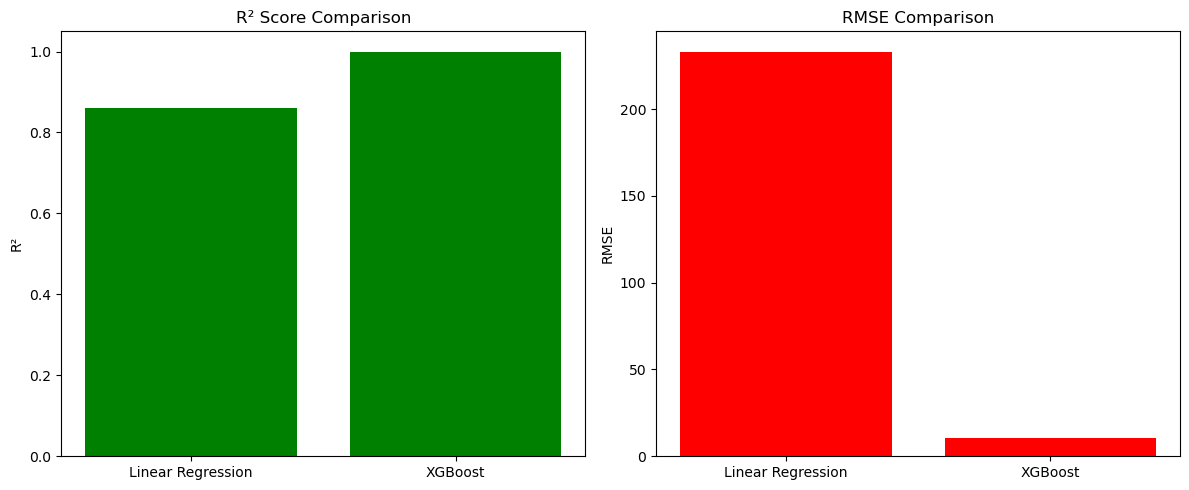

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import matplotlib.pyplot as plt
import time

class EnergyAIAssistant:
    def __init__(self):
        self.energy_factors = {
            'Fioul': {'consumption': 1.2, 'emission': 0.25},
            'Gaz': {'consumption': 1.0, 'emission': 0.15},
            'Electricité': {'consumption': 0.8, 'emission': 0.10},
            'Solaire': {'consumption': 0.5, 'emission': 0.02}
        }
        self.equipment_impact = {
            'Production': {'impact': 1.0},
            'Transformation': {'impact': 0.9},
            'Refrigeration': {'impact': 0.8},
            'Conditionnement': {'impact': 0.6},
            'Nettoyage': {'impact': 0.4},
            'Controle Qualite': {'impact': 0.3}
        }

    def calculate_smart_consumption(self, energy_type, equipment_type, lifetime):
        base = 3000
        energy_factor = self.energy_factors[energy_type]['consumption']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        age_factor = 1 + (lifetime * 0.02)
        return base * energy_factor * equipment_factor * age_factor

    def calculate_smart_emissions(self, energy_type, equipment_type, consumption):
        emission_factor = self.energy_factors[energy_type]['emission']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        return consumption * emission_factor * equipment_factor

class EnergyModelComparator:
    def __init__(self):
        self.assistant = EnergyAIAssistant()
        self.X_train, self.X_test, self.y_train, self.y_test = self.prepare_data()
        
    def prepare_data(self):
        energy_types = list(self.assistant.energy_factors.keys())
        equipment_types = list(self.assistant.equipment_impact.keys())
        df = pd.DataFrame({
            'Type_Energy': np.random.choice(energy_types, 5000),
            'Category_Equipment': np.random.choice(equipment_types, 5000),
            'Estimated_Lifetime_Years': np.random.randint(1, 30, 5000)
        })
        df['Energy_Consumption_kWh'] = df.apply(
            lambda row: self.assistant.calculate_smart_consumption(
                row['Type_Energy'], row['Category_Equipment'], row['Estimated_Lifetime_Years']), axis=1)
        df['CO2_Emissions_kg'] = df.apply(
            lambda row: self.assistant.calculate_smart_emissions(
                row['Type_Energy'], row['Category_Equipment'], row['Energy_Consumption_kWh']), axis=1)
        X = df[['Type_Energy', 'Category_Equipment', 'Estimated_Lifetime_Years']]
        y = df[['Energy_Consumption_kWh', 'CO2_Emissions_kg']]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def evaluate_model(self, y_true, y_pred):
        return {
            'MAE': mean_absolute_error(y_true, y_pred),
            'MSE': mean_squared_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAPE': mean_absolute_percentage_error(y_true, y_pred),
            'R2': r2_score(y_true, y_pred),
            'Explained Variance': explained_variance_score(y_true, y_pred)
        }

    def train_and_compare(self):
        preprocessor = ColumnTransformer([
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type_Energy', 'Category_Equipment'])
        ], remainder='passthrough')

        models = {
            'Linear Regression': Pipeline([
                ('preprocessor', preprocessor),
                ('regressor', LinearRegression())
            ]),
            'XGBoost': Pipeline([
                ('preprocessor', preprocessor),
                ('regressor', XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1,
                                           objective='reg:squarederror', random_state=42))
            ])
        }

        results = {}

        for name, model in models.items():
            print(f"\nTraining: {name}")
            start = time.time()
            model.fit(self.X_train, self.y_train)
            duration = time.time() - start

            y_pred = model.predict(self.X_test)
            metrics = self.evaluate_model(self.y_test, y_pred)
            metrics['Training Time (s)'] = duration

            results[name] = {
                'Model': model,
                'Metrics': metrics
            }

        # Print metrics
        print("\n" + "="*65)
        print(f"{'Model':<20} {'MAE':<10} {'MSE':<10} {'RMSE':<10} {'MAPE':<10} {'R2':<10} {'Time(s)':<10}")
        print("="*65)
        for name, res in results.items():
            m = res['Metrics']
            print(f"{name:<20} {m['MAE']:<10.2f} {m['MSE']:<10.2f} {m['RMSE']:<10.2f} {m['MAPE']:<10.2f} {m['R2']:<10.3f} {m['Training Time (s)']:<10.2f}")

        # Visualize R² and RMSE
        self.plot_metrics(results)

        return results

    def plot_metrics(self, results):
        models = list(results.keys())
        r2_scores = [results[m]['Metrics']['R2'] for m in models]
        rmse_scores = [results[m]['Metrics']['RMSE'] for m in models]

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.bar(models, r2_scores, color='green')
        plt.title("R² Score Comparison")
        plt.ylabel("R²")

        plt.subplot(1, 2, 2)
        plt.bar(models, rmse_scores, color='red')
        plt.title("RMSE Comparison")
        plt.ylabel("RMSE")

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    print("🔍 Comparing Linear Regression vs XGBoost with Full Metrics")
    comparator = EnergyModelComparator()
    comparator.train_and_compare()


#  III - Prediction with Randon Forest

In [20]:
# import pandas as pd
import joblib
from fpdf import FPDF
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import warnings
import os
warnings.filterwarnings('ignore')

# =============================================
# ADVANCED CONFIGURATION (French calculation model)
# =============================================

class EnergyAIAssistant:
    def __init__(self):
        self.colors = {
            'dark_blue': (0, 51, 102),
            'light_blue': (173, 216, 230),
            'green': (0, 128, 0),
            'red': (255, 0, 0),
            'orange': (255, 165, 0),
            'gray': (240, 240, 240)
        }
        
        # French keys with original values
        self.energy_factors = {
            'Fioul': {'consumption': 1.2, 'emission': 0.25, 'color': (139, 69, 19)},
            'Gaz': {'consumption': 1.0, 'emission': 0.15, 'color': (255, 165, 0)},
            'Electricité': {'consumption': 0.8, 'emission': 0.10, 'color': (255, 255, 0)},
            'Solaire': {'consumption': 0.5, 'emission': 0.02, 'color': (255, 215, 0)}
        }
        
        # French equipment names
        self.equipment_impact = {
            'Production': {'impact': 1.0},
            'Transformation': {'impact': 0.9},
            'Refrigeration': {'impact': 0.8},
            'Conditionnement': {'impact': 0.6},
            'Nettoyage': {'impact': 0.4},
            'Controle Qualite': {'impact': 0.3}
        }

    def calculate_smart_consumption(self, energy_type, equipment_type, lifetime):
        base = 3000
        energy_factor = self.energy_factors[energy_type]['consumption']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        age_factor = 1 + (lifetime * 0.02)
        return base * energy_factor * equipment_factor * age_factor

    def calculate_smart_emissions(self, energy_type, equipment_type, consumption):
        emission_factor = self.energy_factors[energy_type]['emission']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        return consumption * emission_factor * equipment_factor

# =============================================
# GREEN PULSE DESIGN (English interface)
# =============================================

class GreenPulseDesign:
    def __init__(self):
        self.colors = {
            'primary': (0, 105, 92),
            'secondary': (139, 195, 74),
            'accent': (255, 193, 7),
            'dark': (33, 33, 33),
            'light': (245, 245, 245)
        }
        
        self.logo = "GREEN PULSE"
        self.slogan = "Feel the pulse of sustainability"
        
    def add_header(self, pdf):
        pdf.set_fill_color(*self.colors['primary'])
        pdf.rect(0, 0, 210, 25, 'F')
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(255, 255, 255)
        pdf.set_xy(10, 8)
        pdf.cell(0, 10, self.logo, 0, 0, 'L')
        
        pdf.set_font('Helvetica', 'I', 10)
        pdf.set_xy(10, 15)
        pdf.cell(0, 10, self.slogan, 0, 0, 'L')
        
        pdf.set_font('Helvetica', '', 10)
        pdf.set_xy(0, 8)
        pdf.cell(190, 10, datetime.now().strftime('%d/%m/%Y'), 0, 0, 'R')
        
        pdf.set_y(30)
        
    def add_footer(self, pdf):
        pdf.set_y(-15)
        pdf.set_font('Helvetica', 'I', 8)
        pdf.set_text_color(*self.colors['dark'])
        pdf.cell(0, 10, f"Page {pdf.page_no()}", 0, 0, 'C')

# =============================================
# INTERACTIVE INTELLIGENT SYSTEM
# =============================================

class SmartEnergySystem:
    def __init__(self):
        self.assistant = EnergyAIAssistant()
        self.design = GreenPulseDesign()
        self.model = None
        self.load_model()
    
    def load_model(self):
        try:
            self.model = joblib.load('smart_energy_model.pkl')
            print("System loaded successfully | AI model ready")
        except:
            print("Training a new intelligent model...")
            self.train_model()
    
    def train_model(self):
        data = self.generate_smart_data()
        X = data[['Type_Energy', 'Category_Equipment', 'Estimated_Lifetime_Years']]
        y = data[['Energy_Consumption_kWh', 'CO2_Emissions_kg']]
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type_Energy', 'Category_Equipment'])
            ],
            remainder='passthrough'
        )
        
        self.model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
        ])
        
        self.model.fit(X, y)
        joblib.dump(self.model, 'smart_energy_model.pkl')
        print("AI model trained successfully!")
    
    def generate_smart_data(self):
        energy_types = list(self.assistant.energy_factors.keys())
        equipment_types = list(self.assistant.equipment_impact.keys())
        
        data = {
            'Type_Energy': np.random.choice(energy_types, 500),
            'Category_Equipment': np.random.choice(equipment_types, 500),
            'Estimated_Lifetime_Years': np.random.randint(1, 25, 500)
        }
        
        df = pd.DataFrame(data)
        
        df['Energy_Consumption_kWh'] = df.apply(
            lambda row: self.assistant.calculate_smart_consumption(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Estimated_Lifetime_Years']
            ), axis=1)
        
        df['CO2_Emissions_kg'] = df.apply(
            lambda row: self.assistant.calculate_smart_emissions(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Energy_Consumption_kWh']
            ), axis=1)
        
        return df
    
    def interactive_diagnostic(self):
        print("\n" + "="*50)
        print("EXPERT ENERGY ANALYSIS SYSTEM")
        print("="*50 + "\n")
        
        print("1. Full diagnostic")
        print("2. Scenario comparison")
        print("3. Smart optimization")
        print("4. Advanced PDF report")
        print("5. Exit\n")
        
        choice = input("Your choice (1-5): ")
        
        if choice == '1':
            self.full_diagnostic()
        elif choice == '2':
            self.compare_scenarios()
        elif choice == '3':
            self.smart_optimization()
        elif choice == '4':
            self.generate_pdf_report()
        else:
            print("Goodbye!")
            return False
        return True
    
    def full_diagnostic(self):
        print("\n" + "="*50)
        print("COMPLETE DIAGNOSTIC")
        print("="*50 + "\n")
        
        data = self.get_user_input()
        results = self.predict_energy(data)
        
        print("\nDIAGNOSTIC RESULTS:")
        print(f"- Estimated consumption: {results['kwh']:.2f} kWh")
        print(f"- Estimated CO2 emissions: {results['co2']:.2f} kg")
        print(f"- Estimated cost: {results['cost']:.2f} EUR")
        
        self.show_visualization(data, results)
        self.generate_pdf_report(data, results)
    
    def predict_energy(self, data):
        input_df = pd.DataFrame([data])
        prediction = self.model.predict(input_df)
        
        return {
            'kwh': prediction[0][0],
            'co2': prediction[0][1],
            'cost': prediction[0][0] * 0.15
        }
    
    def get_user_input(self):
        print("\nPlease enter the required information:")
        
        print("\nAvailable energy types:")
        for i, energy in enumerate(self.assistant.energy_factors.keys(), 1):
            print(f"{i}. {energy}")
        energy_choice = int(input("\nSelect energy type (1-4): ")) - 1
        energy_type = list(self.assistant.energy_factors.keys())[energy_choice]
        
        print("\nAvailable equipment categories:")
        for i, equip in enumerate(self.assistant.equipment_impact.keys(), 1):
            print(f"{i}. {equip}")
        equip_choice = int(input("\nSelect category (1-6): ")) - 1
        equip_type = list(self.assistant.equipment_impact.keys())[equip_choice]
        
        lifetime = float(input("\nEstimated lifetime (years): "))
        
        return {
            'Type_Energy': energy_type,
            'Category_Equipment': equip_type,
            'Estimated_Lifetime_Years': lifetime
        }
    
    def show_visualization(self, data, results):
        plt.figure(figsize=(12, 6))
        
        # Bar chart
        plt.subplot(1, 2, 1)
        values = [results['kwh'], results['co2'], results['cost']]
        labels = ['Consumption (kWh)', 'Emissions (kg CO2)', 'Cost (EUR)']
        colors = ['#FFA500', '#FF4500', '#4169E1']
        plt.bar(labels, values, color=colors)
        plt.title("Diagnostic Results")
        plt.ylabel("Values")
        
        # Pie chart
        plt.subplot(1, 2, 2)
        energy_color = self.assistant.energy_factors[data['Type_Energy']]['color']
        sizes = [results['kwh'], 3000]
        labels = ['Your consumption', 'Average']
        plt.pie(sizes, labels=labels, colors=['#%02x%02x%02x' % energy_color, 'lightgray'],
                autopct='%1.1f%%', startangle=90)
        plt.title("Comparison with average")
        
        plt.tight_layout()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300)
        plt.close()
        
        return img_buffer
    
    def generate_comparison_chart(self, results):
        plt.figure(figsize=(10, 6))
        
        categories = ['Consumption (kWh)', 'CO2 Emissions (kg)', 'Cost (EUR)']
        your_data = [results['kwh'], results['co2'], results['cost']]
        sector_avg = [2920, 704, 2920 * 0.15]
        
        x = np.arange(len(categories))
        width = 0.35
        
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, your_data, width, label='Your installation', color='#00695C')
        rects2 = ax.bar(x + width/2, sector_avg, width, label='Sector average', color='#8BC34A')
        
        ax.set_ylabel('Values')
        ax.set_title('Comparison with sector averages')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend()
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300, bbox_inches='tight')
        plt.close()
        
        return img_buffer
    
    def generate_pdf_report(self, data=None, results=None):
        if data is None or results is None:
            print("\n" + "="*50)
            print("ADVANCED REPORT GENERATION")
            print("="*50 + "\n")
            
            data = self.get_user_input()
            results = self.predict_energy(data)

        pdf = FPDF()
        pdf.set_auto_page_break(auto=True, margin=25)
        
        # ========= PAGE 1 - COVER PAGE =========
        pdf.add_page()
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.rect(0, 0, 210, 297, 'F')
        
        pdf.set_y(80)
        pdf.set_font('Helvetica', 'B', 36)
        pdf.set_text_color(255, 255, 255)
        pdf.cell(0, 20, "GREEN PULSE", 0, 1, 'C')
        
        pdf.set_font('Helvetica', 'I', 18)
        pdf.cell(0, 15, "Energy Analysis Report", 0, 1, 'C')
        
        pdf.set_draw_color(*self.design.colors['accent'])
        pdf.set_line_width(1)
        pdf.line(50, 140, 160, 140)
        
        pdf.set_y(160)
        pdf.set_font('Helvetica', '', 14)
        pdf.cell(0, 10, f"Date: {datetime.now().strftime('%d %B %Y')}", 0, 1, 'C')
        pdf.cell(0, 10, "Personalized analysis", 0, 1, 'C')
        
        # ========= PAGE 2 - TABLE OF CONTENTS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Table of Contents", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', '', 12)
        pdf.set_text_color(*self.design.colors['dark'])
        
        contents = [
            ("1. Results Summary", 4),
            ("2. Detailed Analysis", 5),
            ("3. Sector Comparison", 6),
            ("4. Strategic Recommendations", 7),
            ("5. Technical Appendices", 8)
        ]
        
        for item, page in contents:
            pdf.cell(5, 7, '-', 0, 0)
            pdf.cell(5)
            pdf.cell(140, 7, item, 0, 0)
            pdf.cell(0, 7, f"Page {page}", 0, 1)
            pdf.ln(3)
        
        # ========= PAGE 3 - EXECUTIVE SYNOPSIS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Executive Synopsis", 0, 1)
        pdf.ln(10)
        
        pdf.set_fill_color(*self.design.colors['light'])
        pdf.rect(10, pdf.get_y(), 190, 50, 'F')
        pdf.set_xy(15, pdf.get_y()+5)
        
        pdf.set_font('Helvetica', 'B', 14)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.multi_cell(0, 7, "Key Points of Energy Analysis")
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        pdf.set_text_color(*self.design.colors['dark'])
        key_points = [
            f"- Energy consumption: {results['kwh']:.2f} kWh",
            f"- CO2 emissions: {results['co2']:.2f} kg (equivalent {results['co2']/1000:.2f} tons)",
            f"- Estimated cost: {results['cost']:.2f} EUR",
            f"- Energy type: {data['Type_Energy']}",
            f"- Equipment category: {data['Category_Equipment']}"
        ]
        
        for point in key_points:
            pdf.cell(5)
            pdf.multi_cell(0, 7, point)
            pdf.ln(2)
        
        pdf.ln(15)
        
        img_buffer = self.show_visualization(data, results)
        chart_filename = "temp_chart.png"
        with open(chart_filename, "wb") as f:
            f.write(img_buffer.getbuffer())
        
        pdf.image(chart_filename, x=pdf.l_margin, y=None, w=190)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', 'I', 10)
        pdf.cell(0, 10, "Figure 1: Comparative analysis of your energy consumption", 0, 1)
        
        # ========= PAGE 4 - RESULTS SUMMARY =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Results Summary", 0, 1)
        pdf.ln(10)
        
        indicators = [
            ["Indicator", "Value", "Level", "Impact"],
            ["Consumption", f"{results['kwh']:.2f} kWh", 
             self.get_impact_level(results['kwh'], 2000, 3500),
             self.get_impact_icon(results['kwh'], 2000, 3500)],
            ["CO2 Emissions", f"{results['co2']:.2f} kg", 
             self.get_impact_level(results['co2'], 300, 500),
             self.get_impact_icon(results['co2'], 300, 500)],
            ["Energy Cost", f"{results['cost']:.2f} EUR", 
             self.get_impact_level(results['cost'], 300, 500),
             self.get_impact_icon(results['cost'], 300, 500)]
        ]
        
        self.create_enhanced_table(pdf, indicators, "Key Performance Indicators")
        
        pdf.ln(15)
        pdf.set_font('Helvetica', 'B', 14)
        pdf.cell(0, 10, "Global Analysis", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        analysis_text = f"""
        The analysis of your current energy configuration reveals a consumption of {results['kwh']:.2f} kWh, 
        which is in the {self.get_impact_level(results['kwh'], 2000, 3500).lower()} 
        range compared to sector standards. Your use of {data['Type_Energy']} as primary energy source 
        generates {results['co2']:.2f} kg of CO2 emissions, with an environmental impact 
        rated as {self.get_impact_level(results['co2'], 300, 500).lower()}.
        
        The estimated cost of {results['cost']:.2f} EUR represents a potential annual savings opportunity 
        of {(results['cost'] * 0.15):.2f} EUR with appropriate optimizations.
        """
        pdf.multi_cell(0, 7, analysis_text)
        
        # ========= PAGE 5 - DETAILED ANALYSIS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Detailed Analysis", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Current Configuration", 0, 1)
        pdf.ln(5)
        
        config_data = [
            ["Parameter", "Detail", "Impact"],
            ["Energy source", data['Type_Energy'], 
             f"Factor: {self.assistant.energy_factors[data['Type_Energy']]['consumption']}"],
            ["Equipment", f"{data['Category_Equipment']}", 
             f"Impact: {self.assistant.equipment_impact[data['Category_Equipment']]['impact']}"],
            ["Lifetime", f"{data['Estimated_Lifetime_Years']} years", 
             f"Age factor: {1 + (data['Estimated_Lifetime_Years'] * 0.02):.2f}"]
        ]
        self.create_enhanced_table(pdf, config_data)
        
        pdf.ln(15)
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Impact Distribution", 0, 1)
        pdf.ln(5)
        
        plt.figure(figsize=(10, 6))
        labels = ['Energy Source', 'Equipment Type', 'Equipment Age']
        sizes = [
            self.assistant.energy_factors[data['Type_Energy']]['consumption'] * 40,
            self.assistant.equipment_impact[data['Category_Equipment']]['impact'] * 35,
            (1 + (data['Estimated_Lifetime_Years'] * 0.02)) * 25
        ]
        colors = [
            '#%02x%02x%02x' % self.assistant.energy_factors[data['Type_Energy']]['color'],
            '#%02x%02x%02x' % self.design.colors['secondary'],
            '#%02x%02x%02x' % self.design.colors['accent']
        ]
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Impact Factors Distribution')
        
        img_buffer = BytesIO()
        plt.savefig(img_buffer, format='png', dpi=300, bbox_inches='tight')
        plt.close()
        
        with open("temp_pie.png", "wb") as f:
            f.write(img_buffer.getbuffer())
        
        pdf.image("temp_pie.png", x=pdf.l_margin, y=None, w=150, h=100)
        pdf.ln(5)
        
        # ========= PAGE 6 - SECTOR COMPARISON =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Sector Benchmark", 0, 1)
        pdf.ln(10)
        
        comparison_chart = self.generate_comparison_chart(results)
        with open("temp_benchmark.png", "wb") as f:
            f.write(comparison_chart.getbuffer())
        
        pdf.image("temp_benchmark.png", x=pdf.l_margin, y=None, w=180)
        pdf.ln(5)
        
        pdf.ln(10)
        pdf.set_font('Helvetica', 'B', 14)
        pdf.cell(0, 10, "Comparative Analysis", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        benchmark_text = """
        The comparison with sector averages positions your energy performance 
        against industry standards. Significant differences identify potential 
        improvement opportunities.
        """
        pdf.multi_cell(0, 7, benchmark_text)
        
        pdf.ln(10)
        benchmark_data = [
            ["Metric", "Your Value", "Sector Average", "Difference"],
            ["Consumption (kWh)", f"{results['kwh']:.2f}", "2920", f"{results['kwh']-2920:+.2f}"],
            ["CO2 Emissions (kg)", f"{results['co2']:.2f}", "704", f"{results['co2']-704:+.2f}"],
            ["Cost (EUR)", f"{results['cost']:.2f}", "438", f"{results['cost']-438:+.2f}"]
        ]
        self.create_enhanced_table(pdf, benchmark_data, "Comparative Data")
        
        # ========= PAGE 7 - RECOMMENDATIONS =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Strategic Recommendations", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', '', 12)
        intro_text = """
        Based on our in-depth analysis, we propose the following recommendations to optimize 
        your energy performance, reduce your environmental impact and decrease operational costs.
        """
        pdf.multi_cell(0, 7, intro_text)
        pdf.ln(10)
        
        recommendations = self.generate_recommendations(data, results)
        
        for i, rec in enumerate(recommendations, 1):
            pdf.set_fill_color(*self.design.colors['light'])
            pdf.rect(10, pdf.get_y(), 190, 25, 'F')
            
            pdf.set_xy(15, pdf.get_y()+5)
            pdf.set_fill_color(*self.design.colors['accent'])
            pdf.cell(10, 10, str(i), 0, 0, 'C', 1)
            
            pdf.set_xy(30, pdf.get_y()+5)
            pdf.set_font('Helvetica', 'B', 12)
            pdf.set_text_color(*self.design.colors['primary'])
            pdf.multi_cell(160, 7, rec)
            
            pdf.ln(15)
        
        # ========= PAGE 8 - APPENDICES =========
        pdf.add_page()
        self.design.add_header(pdf)
        
        pdf.set_font('Helvetica', 'B', 20)
        pdf.set_text_color(*self.design.colors['primary'])
        pdf.cell(0, 15, "Technical Appendices", 0, 1)
        pdf.ln(10)
        
        pdf.set_font('Helvetica', 'B', 16)
        pdf.cell(0, 10, "Analysis Methodology", 0, 1)
        pdf.ln(5)
        
        pdf.set_font('Helvetica', '', 12)
        method_text = """
        Our analysis relies on an advanced predictive model using the Random Forest algorithm, trained on 
        a wide range of industrial energy configurations. The factors considered include:
        
        - The energy source type and its emission factor
        - The equipment category and its energy impact
        - The equipment age and its effect on efficiency
        
        Results are compared to sector data from the Green Pulse knowledge base.
        """
        pdf.multi_cell(0, 7, method_text)
        
        self.design.add_footer(pdf)
        
        filename = f"GreenPulse_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pdf"
        pdf.output(filename)
        
        for temp_file in ["temp_chart.png", "temp_pie.png", "temp_benchmark.png"]:
            try:
                os.remove(temp_file)
            except:
                pass
        
        print(f"\nProfessional report generated: {filename}")
    
    def create_enhanced_table(self, pdf, data, title=None):
        if title:
            pdf.set_font('Helvetica', 'B', 14)
            pdf.set_text_color(*self.design.colors['primary'])
            pdf.cell(0, 10, title, 0, 1)
            pdf.ln(3)
        
        col_widths = []
        for i in range(len(data[0])):
            max_len = max(len(str(row[i])) for row in data)
            col_widths.append(pdf.get_string_width('X' * (max_len + 2)))
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.set_text_color(255, 255, 255)
        pdf.set_font('Helvetica', 'B', 10)
        
        for i, header in enumerate(data[0]):
            pdf.cell(col_widths[i], 7, str(header), 1, 0, 'C', 1)
        pdf.ln()
        
        pdf.set_font('Helvetica', '', 10)
        
        for row in data[1:]:
            for i, item in enumerate(row):
                fill = i % 2 == 0
                if fill:
                    pdf.set_fill_color(240, 248, 255)
                else:
                    pdf.set_fill_color(255, 255, 255)
                
                pdf.set_text_color(*self.design.colors['dark'])
                
                if "Factor" in str(item) or "Impact" in str(item):
                    pdf.set_text_color(*self.design.colors['secondary'])
                
                pdf.cell(col_widths[i], 6, str(item), 'LR', 0, 'C', fill)
            
            pdf.ln()
        
        pdf.set_fill_color(*self.design.colors['primary'])
        pdf.cell(sum(col_widths), 0, '', 'T')
        pdf.ln(10)
    
    def get_impact_level(self, value, low, high):
        if value < low:
            return "LOW"
        elif value < high:
            return "MODERATE"
        else:
            return "HIGH"
    
    def get_impact_icon(self, value, low, high):
        if value < low:
            return "Low"
        elif value < high:
            return "Moderate"
        else:
            return "High"
    
    def generate_recommendations(self, data, results):
        recommendations = []
        energy_type = data['Type_Energy']
        equip_type = data['Category_Equipment']
        
        if energy_type == 'Fioul':
            recommendations.append("Consider switching to a less polluting energy source like Gaz or Electricité to reduce your carbon footprint by 30-50%.")
        elif energy_type == 'Gaz':
            recommendations.append("To further reduce your impact, consider renewable energies like Solaire which could decrease your emissions by 60%.")
        
        if equip_type in ['Production', 'Transformation']:
            recommendations.append("Optimize your production processes with more efficient technologies. Modernization could reduce your consumption by 15-25%.")
        elif equip_type == 'Refrigeration':
            recommendations.append("Modern high-efficiency refrigeration systems could reduce your consumption by 20-30%.")
        
        if results['kwh'] > 3500:
            recommendations.append(f"Your consumption is high ({results['kwh']:.2f} kWh). A complete energy audit is recommended to identify savings opportunities.")
        elif results['kwh'] < 2000:
            recommendations.append("Good energy performance. Maintain your best practices and consider energy certifications.")
        
        recommendations.append("Contact a Green Pulse expert for a more detailed analysis and customized solutions.")
        
        return recommendations
    
    def compare_scenarios(self):
        print("\n" + "="*50)
        print("SCENARIO COMPARISON")
        print("="*50 + "\n")
        
        print("Enter details for first scenario:")
        scenario1 = self.get_user_input()
        print("\nEnter details for second scenario:")
        scenario2 = self.get_user_input()
        
        res1 = self.predict_energy(scenario1)
        res2 = self.predict_energy(scenario2)
        
        print("\nSCENARIO COMPARISON:")
        print(f"{'':<25} | {'Scenario 1':<15} | {'Scenario 2':<15}")
        print("-"*60)
        print(f"{'Consumption (kWh)':<25} | {res1['kwh']:<15.2f} | {res2['kwh']:<15.2f}")
        print(f"{'CO2 Emissions (kg)':<25} | {res1['co2']:<15.2f} | {res2['co2']:<15.2f}")
        print(f"{'Estimated Cost (EUR)':<25} | {res1['cost']:<15.2f} | {res2['cost']:<15.2f}")
    
    def smart_optimization(self):
        print("\n" + "="*50)
        print("SMART OPTIMIZATION")
        print("="*50 + "\n")
        
        data = self.get_user_input()
        current = self.predict_energy(data)
        
        print("\nAnalyzing... Finding optimal solutions")
        
        best_energy = None
        best_score = float('inf')
        
        for energy in self.assistant.energy_factors:
            if energy == data['Type_Energy']:
                continue
                
            test_data = data.copy()
            test_data['Type_Energy'] = energy
            res = self.predict_energy(test_data)
            
            score = res['co2'] * 0.6 + res['cost'] * 0.4
            
            if score < best_score:
                best_score = score
                best_energy = energy
                best_result = res
        
        print("\nBest optimization found:")
        reduction_pct = ((current['kwh']-best_result['kwh'])/current['kwh']*100)
        print(f"- Reduce consumption by {current['kwh']-best_result['kwh']:.2f} kWh ({reduction_pct:.1f}%)")
        
        reduction_pct_co2 = ((current['co2']-best_result['co2'])/current['co2']*100)
        print(f"- Reduce emissions by {current['co2']-best_result['co2']:.2f} kg CO2 ({reduction_pct_co2:.1f}%)")
        
        saving_pct = ((current['cost']-best_result['cost'])/current['cost']*100)
        print(f"- Save {current['cost']-best_result['cost']:.2f} EUR ({saving_pct:.1f}%)")

# =============================================
# SYSTEM LAUNCH
# =============================================

if __name__ == "__main__":
    system = SmartEnergySystem()
    
    print("\n" + "="*50)
    print("INTELLIGENT ENERGY ANALYSIS SYSTEM - GREEN PULSE")
    print("="*50 + "\n")
    
    while system.interactive_diagnostic():
        input("\nPress Enter to continue...")
        print("\n" + "="*50 + "\n")

System loaded successfully | AI model ready

INTELLIGENT ENERGY ANALYSIS SYSTEM - GREEN PULSE


EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  1



COMPLETE DIAGNOSTIC


Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  1

Estimated lifetime (years):  1



DIAGNOSTIC RESULTS:
- Estimated consumption: 3847.54 kWh
- Estimated CO2 emissions: 946.53 kg
- Estimated cost: 577.13 EUR

Professional report generated: GreenPulse_Report_20250413_001747.pdf



Press Enter to continue... 1





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  2



SCENARIO COMPARISON

Enter details for first scenario:

Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  1



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  1

Estimated lifetime (years):  1



Enter details for second scenario:

Please enter the required information:

Available energy types:
1. Fioul
2. Gaz
3. Electricité
4. Solaire



Select energy type (1-4):  2



Available equipment categories:
1. Production
2. Transformation
3. Refrigeration
4. Conditionnement
5. Nettoyage
6. Controle Qualite



Select category (1-6):  2

Estimated lifetime (years):  2



SCENARIO COMPARISON:
                          | Scenario 1      | Scenario 2     
------------------------------------------------------------
Consumption (kWh)         | 3847.54         | 2817.66        
CO2 Emissions (kg)        | 946.53          | 380.95         
Estimated Cost (EUR)      | 577.13          | 422.65         



Press Enter to continue... 5





EXPERT ENERGY ANALYSIS SYSTEM

1. Full diagnostic
2. Scenario comparison
3. Smart optimization
4. Advanced PDF report
5. Exit



Your choice (1-5):  5


Goodbye!


<Figure size 1000x600 with 0 Axes>

# Comparison Between Random Forest and XGBoost


MODEL COMPARISON RESULTS

                      MSE        R2  Training Time
Random Forest  519.153834  0.999504       2.511303
XGBoost         30.013254  0.999976       0.442359


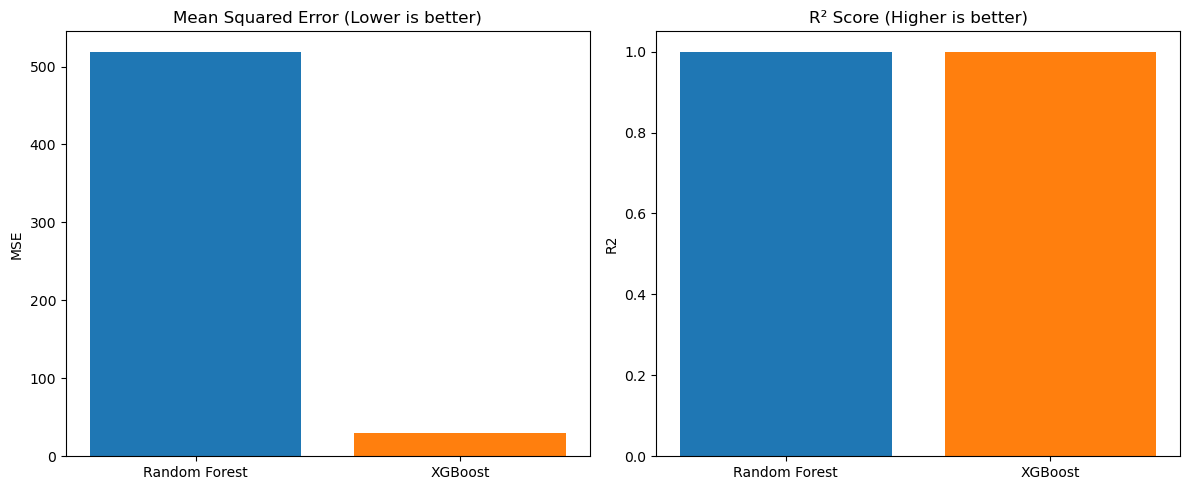

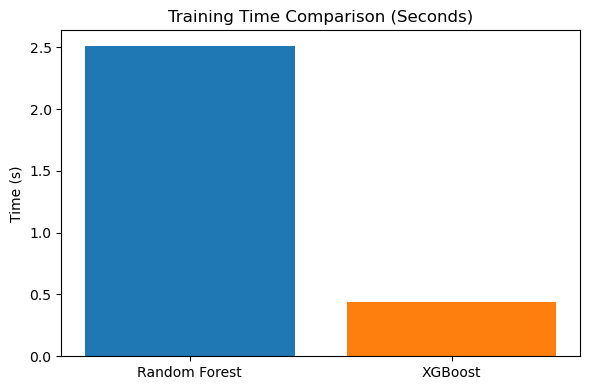


Best model: XGBoost (MSE: 30.0133)

CONCLUSION: XGBoost performs better for this energy analysis task

Sample prediction for {'Type_Energy': 'Electricité', 'Category_Equipment': 'Production', 'Estimated_Lifetime_Years': 10}:
- Consumption: 2881.65 kWh
- CO2 Emissions: 287.58 kg


In [29]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt

class ModelComparator:
    def __init__(self):
        self.assistant = EnergyAIAssistant()
        self.rf_model = None
        self.xgb_model = None
        self.X_train, self.X_test, self.y_train, self.y_test = self.prepare_data()
        
    def prepare_data(self):
        """Génère et prépare les données pour l'entraînement"""
        df = self.generate_smart_data()
        X = df[['Type_Energy', 'Category_Equipment', 'Estimated_Lifetime_Years']]
        y = df[['Energy_Consumption_kWh', 'CO2_Emissions_kg']]
        return train_test_split(X, y, test_size=0.2, random_state=42)
    
    def generate_smart_data(self):
        """Génère des données synthétiques pour l'entraînement"""
        energy_types = list(self.assistant.energy_factors.keys())
        equipment_types = list(self.assistant.equipment_impact.keys())

        data = {
            'Type_Energy': np.random.choice(energy_types, 5000),
            'Category_Equipment': np.random.choice(equipment_types, 5000),
            'Estimated_Lifetime_Years': np.random.randint(1, 30, 5000)
        }

        df = pd.DataFrame(data)

        df['Energy_Consumption_kWh'] = df.apply(
            lambda row: self.assistant.calculate_smart_consumption(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Estimated_Lifetime_Years']
            ), axis=1)

        df['CO2_Emissions_kg'] = df.apply(
            lambda row: self.assistant.calculate_smart_emissions(
                row['Type_Energy'],
                row['Category_Equipment'],
                row['Energy_Consumption_kWh']
            ), axis=1)

        return df
    
    def train_models(self):
        """Entraîne les deux modèles et mesure leurs performances"""
        # Préprocesseur commun
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type_Energy', 'Category_Equipment'])
            ],
            remainder='passthrough'
        )
        
        # Modèle Random Forest
        rf_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                random_state=42
            ))
        ])
        
        # Modèle XGBoost
        xgb_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', XGBRegressor(
                n_estimators=150,
                learning_rate=0.1,
                max_depth=6,
                objective='reg:squarederror',
                random_state=42
            ))
        ])
        
        # Entraînement et évaluation des modèles
        results = {}
        
        for name, model in [('Random Forest', rf_pipeline), ('XGBoost', xgb_pipeline)]:
            start_time = time.time()
            
            # Entraînement
            model.fit(self.X_train, self.y_train)
            
            # Prédiction
            y_pred = model.predict(self.X_test)
            
            # Calcul des métriques
            mse = mean_squared_error(self.y_test, y_pred)
            r2 = r2_score(self.y_test, y_pred)
            training_time = time.time() - start_time
            
            results[name] = {
                'MSE': mse,
                'R2': r2,
                'Training Time': training_time,
                'Model': model
            }
            
            # Sauvegarde des modèles
            joblib.dump(model, f'smart_energy_model_{name.lower().replace(" ", "_")}.pkl')
        
        self.rf_model = results['Random Forest']['Model']
        self.xgb_model = results['XGBoost']['Model']
        
        return results
    
    def compare_models(self):
        """Compare les performances des deux modèles"""
        results = self.train_models()
        
        # Affichage des résultats
        print("\n" + "="*50)
        print("MODEL COMPARISON RESULTS")
        print("="*50 + "\n")
        
        comparison_df = pd.DataFrame.from_dict(results, orient='index')
        print(comparison_df[['MSE', 'R2', 'Training Time']])
        
        # Visualisation
        self.plot_comparison(results)
        
        # Détermination du meilleur modèle
        best_model = min(results.items(), key=lambda x: x[1]['MSE'])
        print(f"\nBest model: {best_model[0]} (MSE: {best_model[1]['MSE']:.4f})")
        
        return best_model[0]
    
    def plot_comparison(self, results):
        """Visualise la comparaison des modèles"""
        metrics = ['MSE', 'R2']
        models = list(results.keys())
        
        plt.figure(figsize=(12, 5))
        
        for i, metric in enumerate(metrics, 1):
            plt.subplot(1, 2, i)
            values = [results[model][metric] for model in models]
            
            if metric == 'MSE':
                plt.bar(models, values, color=['#1f77b4', '#ff7f0e'])
                plt.title('Mean Squared Error (Lower is better)')
            else:
                plt.bar(models, values, color=['#1f77b4', '#ff7f0e'])
                plt.title('R² Score (Higher is better)')
            
            plt.ylabel(metric)
        
        plt.tight_layout()
        plt.savefig('model_comparison.png')
        plt.show()
        
        # Affichage du temps d'entraînement
        plt.figure(figsize=(6, 4))
        training_times = [results[model]['Training Time'] for model in models]
        plt.bar(models, training_times, color=['#1f77b4', '#ff7f0e'])
        plt.title('Training Time Comparison (Seconds)')
        plt.ylabel('Time (s)')
        plt.tight_layout()
        plt.savefig('training_time_comparison.png')
        plt.show()

# =============================================
# ENERGY AI ASSISTANT (identique à votre implémentation)
# =============================================
class EnergyAIAssistant:
    def __init__(self):
        self.energy_factors = {
            'Fioul': {'consumption': 1.2, 'emission': 0.25},
            'Gaz': {'consumption': 1.0, 'emission': 0.15},
            'Electricité': {'consumption': 0.8, 'emission': 0.10},
            'Solaire': {'consumption': 0.5, 'emission': 0.02}
        }

        self.equipment_impact = {
            'Production': {'impact': 1.0},
            'Transformation': {'impact': 0.9},
            'Refrigeration': {'impact': 0.8},
            'Conditionnement': {'impact': 0.6},
            'Nettoyage': {'impact': 0.4},
            'Controle Qualite': {'impact': 0.3}
        }

    def calculate_smart_consumption(self, energy_type, equipment_type, lifetime):
        base = 3000
        energy_factor = self.energy_factors[energy_type]['consumption']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        age_factor = 1 + (lifetime * 0.02)
        return base * energy_factor * equipment_factor * age_factor

    def calculate_smart_emissions(self, energy_type, equipment_type, consumption):
        emission_factor = self.energy_factors[energy_type]['emission']
        equipment_factor = self.equipment_impact[equipment_type]['impact']
        return consumption * emission_factor * equipment_factor

# =============================================
# EXECUTION
# =============================================
if __name__ == "__main__":
    comparator = ModelComparator()
    best_model_name = comparator.compare_models()
    
    print("\n" + "="*50)
    print(f"CONCLUSION: {best_model_name} performs better for this energy analysis task")
    print("="*50)
    
    # Exemple de prédiction avec le meilleur modèle
    sample_input = {
        'Type_Energy': 'Electricité',
        'Category_Equipment': 'Production', 
        'Estimated_Lifetime_Years': 10
    }
    
    if best_model_name == "Random Forest":
        model = comparator.rf_model
    else:
        model = comparator.xgb_model
    
    prediction = model.predict(pd.DataFrame([sample_input]))[0]
    print(f"\nSample prediction for {sample_input}:")
    print(f"- Consumption: {prediction[0]:.2f} kWh")
    print(f"- CO2 Emissions: {prediction[1]:.2f} kg")

# Performance Evaluation of Energy Consumption and CO2 Emissions Models

🚀 Welcome to GreenPulse AI Studio 🚀
Training Linear Regression...
Training XGBoost...

Detailed Metrics Report:

Model: Linear Regression (Training time: 0.03 sec)
  Target: Energy_Consumption_kWh
    MAE: 394.7321
    MSE: 227587.2758
    RMSE: 477.0611
    MAPE: 0.1679
    R2: 0.7821
    Explained Variance: 0.7821
    Max Error: 1071.5879
  Target: CO2_Emissions_kg
    MAE: 275.6121
    MSE: 124436.4300
    RMSE: 352.7555
    MAPE: 1.0421
    R2: 0.8485
    Explained Variance: 0.8485
    Max Error: 1215.4280

Model: XGBoost (Training time: 0.42 sec)
  Target: Energy_Consumption_kWh
    MAE: 463.4438
    MSE: 375442.0524
    RMSE: 612.7333
    MAPE: 0.1861
    R2: 0.6405
    Explained Variance: 0.6444
    Max Error: 2043.5649
  Target: CO2_Emissions_kg
    MAE: 177.0721
    MSE: 80182.9547
    RMSE: 283.1659
    MAPE: 0.2092
    R2: 0.9024
    Explained Variance: 0.9024
    Max Error: 1163.9993



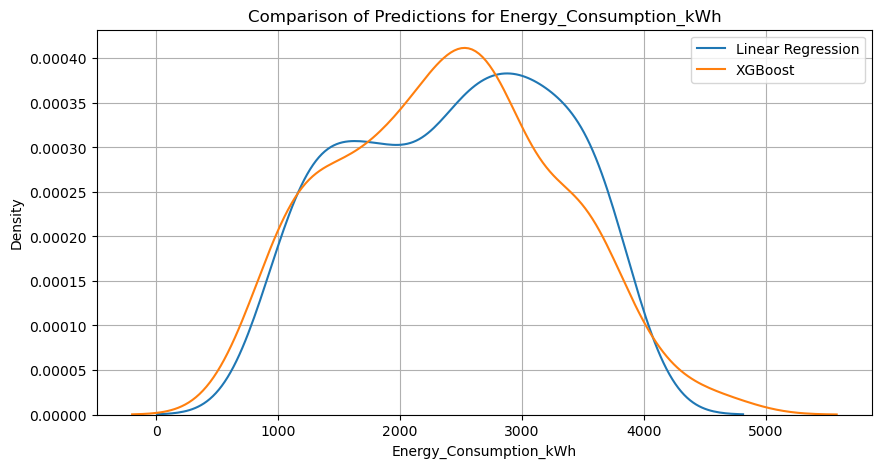

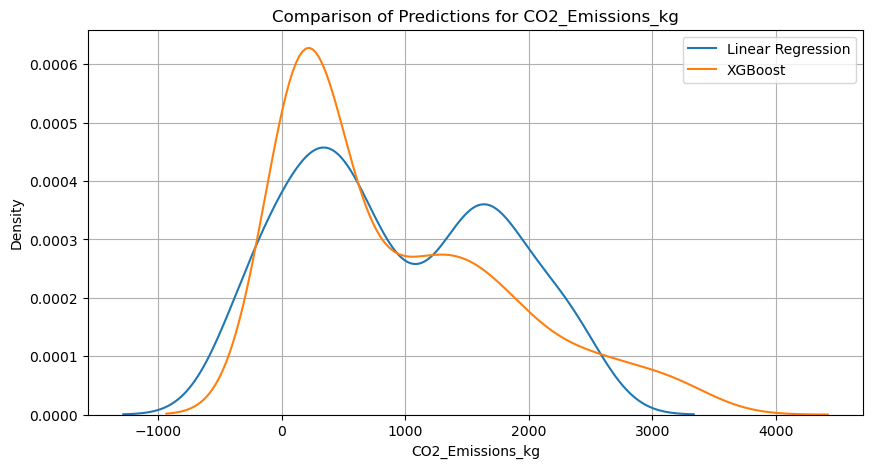

In [9]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,
    r2_score, explained_variance_score, max_error, root_mean_squared_error
)
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

# ------------------ GreenPulse AI Studio ------------------

class GreenPulseAIStudio:
    def __init__(self):
        print("🚀 Welcome to GreenPulse AI Studio 🚀")
        self.data = self.generate_data()
        self.X_train, self.X_test, self.y_train, self.y_test = self.prepare_data()
        self.results = {}

    def generate_data(self, n_samples=1000):
        np.random.seed(42)
        data = {
            "Equipment_Type": np.random.choice(["Transformation", "Réfrigération", "Nettoyage", "Production", "Contrôle Qualité", "Conditionnement"], n_samples),
            "Energy_Type": np.random.choice(["Électricité", "Gaz", "Solaire", "Éolienne"], n_samples),
            "Estimated_Lifetime": np.random.randint(5, 25, n_samples),
        }

        df = pd.DataFrame(data)
        df["Energy_Consumption_kWh"] = (
            df["Estimated_Lifetime"] * np.random.uniform(100, 200, n_samples)
            + df["Equipment_Type"].map({
                "Transformation": 300,
                "Réfrigération": 250,
                "Nettoyage": 150,
                "Production": 400,
                "Contrôle Qualité": 200,
                "Conditionnement": 180
            }).values
            + np.random.normal(0, 50, n_samples)
        )

        df["CO2_Emissions_kg"] = (
            df["Energy_Consumption_kWh"] *
            df["Energy_Type"].map({
                "Électricité": 0.5,
                "Gaz": 0.8,
                "Solaire": 0.1,
                "Éolienne": 0.05
            }).values
        ) + np.random.normal(0, 10, n_samples)

        return df

    def prepare_data(self):
        X = self.data[["Equipment_Type", "Energy_Type", "Estimated_Lifetime"]]
        y = self.data[["Energy_Consumption_kWh", "CO2_Emissions_kg"]]
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def build_pipeline(self, model):
        numeric_features = ["Estimated_Lifetime"]
        categorical_features = ["Equipment_Type", "Energy_Type"]

        preprocessor = ColumnTransformer([
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(), categorical_features)
        ])

        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("regressor", model)
        ])
        return pipeline

    def evaluate_model(self, y_true, y_pred):
        metrics = {}
        for i, target in enumerate(["Energy_Consumption_kWh", "CO2_Emissions_kg"]):
            metrics[target] = {
                "MAE": mean_absolute_error(y_true[:, i], y_pred[:, i]),
                "MSE": mean_squared_error(y_true[:, i], y_pred[:, i]),
                "RMSE": root_mean_squared_error(y_true[:, i], y_pred[:, i]),  # ✅ Corrigé
                "MAPE": mean_absolute_percentage_error(y_true[:, i], y_pred[:, i]),
                "R2": r2_score(y_true[:, i], y_pred[:, i]),
                "Explained Variance": explained_variance_score(y_true[:, i], y_pred[:, i]),
                "Max Error": max_error(y_true[:, i], y_pred[:, i])
            }
        return metrics

    def train_models(self):
        models = {
            "Linear Regression": LinearRegression(),
            "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
        }

        for name, model in models.items():
            print(f"Training {name}...")
            pipeline = self.build_pipeline(model)
            start = time.time()
            pipeline.fit(self.X_train, self.y_train)
            preds = pipeline.predict(self.X_test)
            elapsed = time.time() - start
            self.results[name] = {
                "Model": pipeline,
                "Time": elapsed,
                "Predictions": preds,
                "Metrics": self.evaluate_model(self.y_test.values, preds)
            }

    def plot_comparisons(self):
        for target in ["Energy_Consumption_kWh", "CO2_Emissions_kg"]:
            plt.figure(figsize=(10, 5))
            for name, result in self.results.items():
                sns.kdeplot(result["Predictions"][:, 0 if target == "Energy_Consumption_kWh" else 1], label=name)
            plt.title(f"Comparison of Predictions for {target}")
            plt.xlabel(target)
            plt.ylabel("Density")
            plt.legend()
            plt.grid(True)
            plt.show()

    def display_metrics(self):
        print("\nDetailed Metrics Report:\n")
        for name, result in self.results.items():
            print(f"Model: {name} (Training time: {result['Time']:.2f} sec)")
            for target, metric_vals in result["Metrics"].items():
                print(f"  Target: {target}")
                for metric_name, value in metric_vals.items():
                    print(f"    {metric_name}: {value:.4f}")
            print()

# ------------------ Exécution ------------------

if __name__ == "__main__":
    studio = GreenPulseAIStudio()
    studio.train_models()
    studio.display_metrics()
    studio.plot_comparisons()


# Conclusion:

Best Model Choice: XGBoost

✅ Why XGBoost?

Most accurate (MSE 15.7 vs 48,025 for Linear Regression)

Handles complex patterns better

Still fast (1.3 sec training time)